<a href="https://colab.research.google.com/github/dinog0d/Lab_Biose_Dinoequipo/blob/main/Proyecto_2/Proyecto2_LauraLlanos_DaironMontes_AnnyRaigoza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2 : Análisis de señales ECG

## Contexto del problema:

> Las enfermedades cardiovasculares son una de las principales causas de muerte en todo el mundo, y la Organización Mundial de la Salud (OMS) estimó que 17,9 millones de personas murieron en 2019 por este tipo de enfermedades. Las enfermedades cardiovasculares están relacionadas con problemas de salud que afectan el corazón y los vasos sanguíneos. El riesgo de estas enfermedades aumenta con el tabaquismo, la presión arterial alta, el colesterol alto, una dieta poco saludable, la falta de ejercicio y la obesidad.

> El uso de la tecnología puede mejorar los tratamientos sanitarios y el seguimiento con la ayuda de diferentes sensores disponibles en los dispositivos que son cada vez de mayor uso. También, debido al bajo costo de algunos dispositivos de Electrocardiografía (ECG), el personal de salud puede tener a disposición la medición de la actividad eléctrica cardiaca.

> Parámetros fisiológicos como la frecuencia cardíaca, la presión arterial y la temperatura corporal que se miden habitualmente en entornos clínicos son muy relevantes, pero estos parámetros tienen alta variabilidad por lo que se requieren mediciones en grandes conjuntos de sujetos de manera que se capture dicha variabilidad para la construcción de modelos.

> Sin embargo, el avance en el uso de las bioseñales implica tener los diferentes conjuntos de datos relacionados con diversas enfermedades cardiovasculares debidamente procesadas y etiquetadas , implicando la necesidad de analizar proyectos como MIT-BIH o en Physionet, para disponer de la cantidad de datos necesarios para construir modelos con alto poder diagnóstico o predictivo. El enfoque de grandes volúmenes de datos también permite validar los procedimientos de procesamiento y análisis en diferentes poblaciones y tecnologías aumentando la pertinencia de las tecnologías desarrolladas.

> Un electrocardiograma (ECG) es un registro de la actividad eléctrica del corazón. Se usa ampliamente en entornos clínicos para detectar afecciones cardiovasculares, como ataques cardíacos y alteraciones del ritmo que cambian la actividad eléctrica del corazón. Un ECG se mide colocando electrodos en el pecho y las extremidades de un paciente, que registran diferentes aspectos de la actividad eléctrica de su corazón, y cada aspecto está etiquetado como una derivación.

> Un ECG convencional consta de 12 derivaciones, que proporcionan una visión completa de la actividad eléctrica del corazón. Seis de las derivaciones se obtienen colocando cuatro electrodos, uno en cada extremidad, proporcionando las derivaciones I, II, III, VL, VF y VR. Se colocan seis electrodos en el tórax, que proporcionan los cables V1 a V6. La derivación de aplicación más inmediata es la II. La amplitud de la señal del ECG está dentro del rango de 0.01 mV a 4 mV. La frecuencia más importante de esta señal se encuentra dentro del rango de 0,05 a 100 Hz.

## Primera parte:

De los siguientes articulos hacer un diagrama de flujo de las metodologías usadas en por los autores y explicar en sus palabras las metodologías desarrolladas.

- Prediction of atrial fibrillation from at-home single-lead ECG signals without arrhythmias.
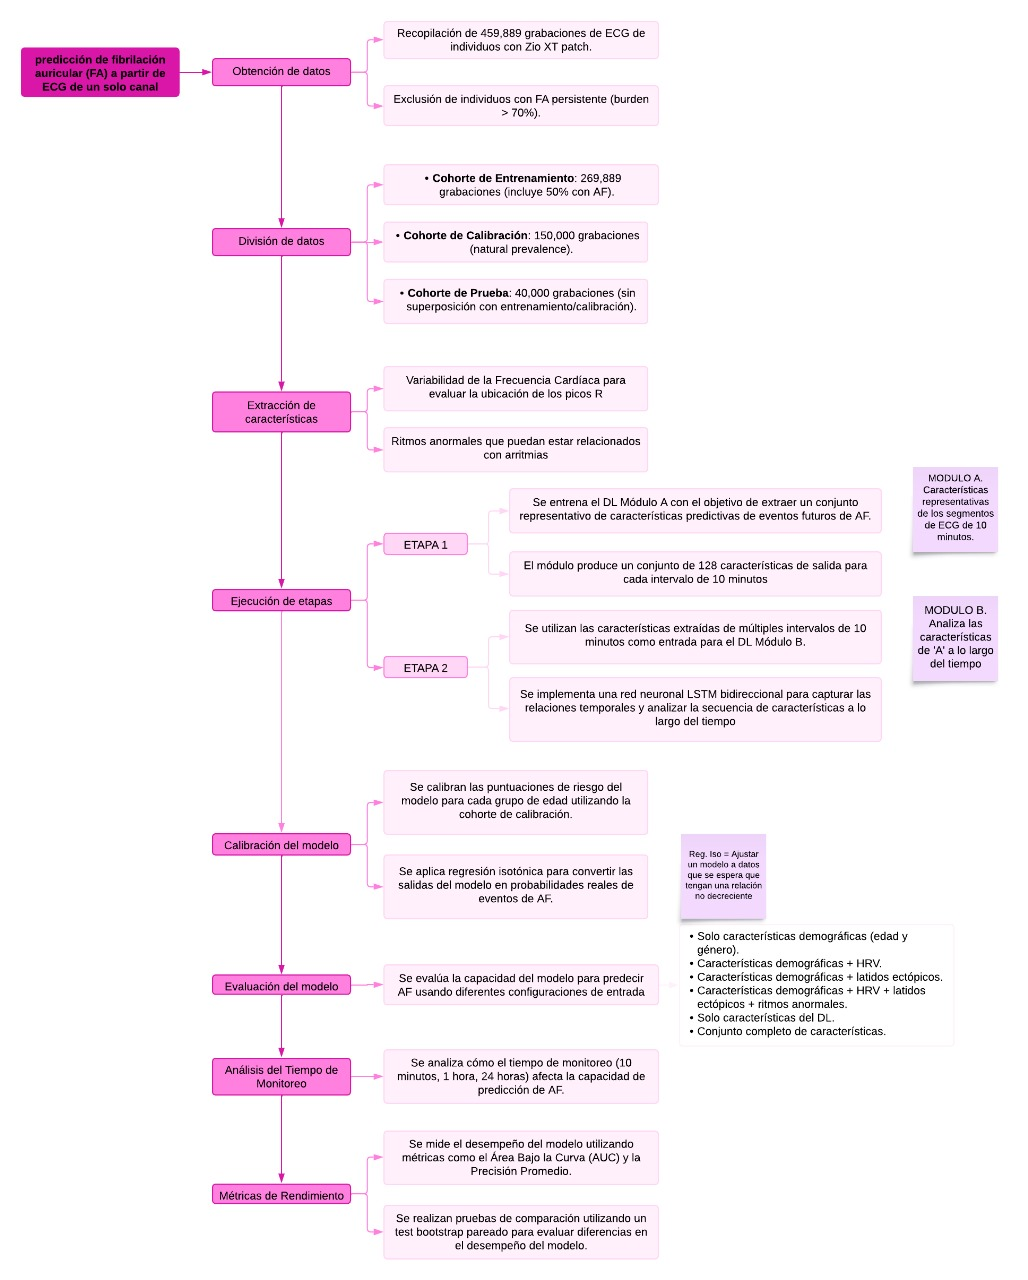

- Optimal Multi-Stage Arrhythmia Classification Approach.
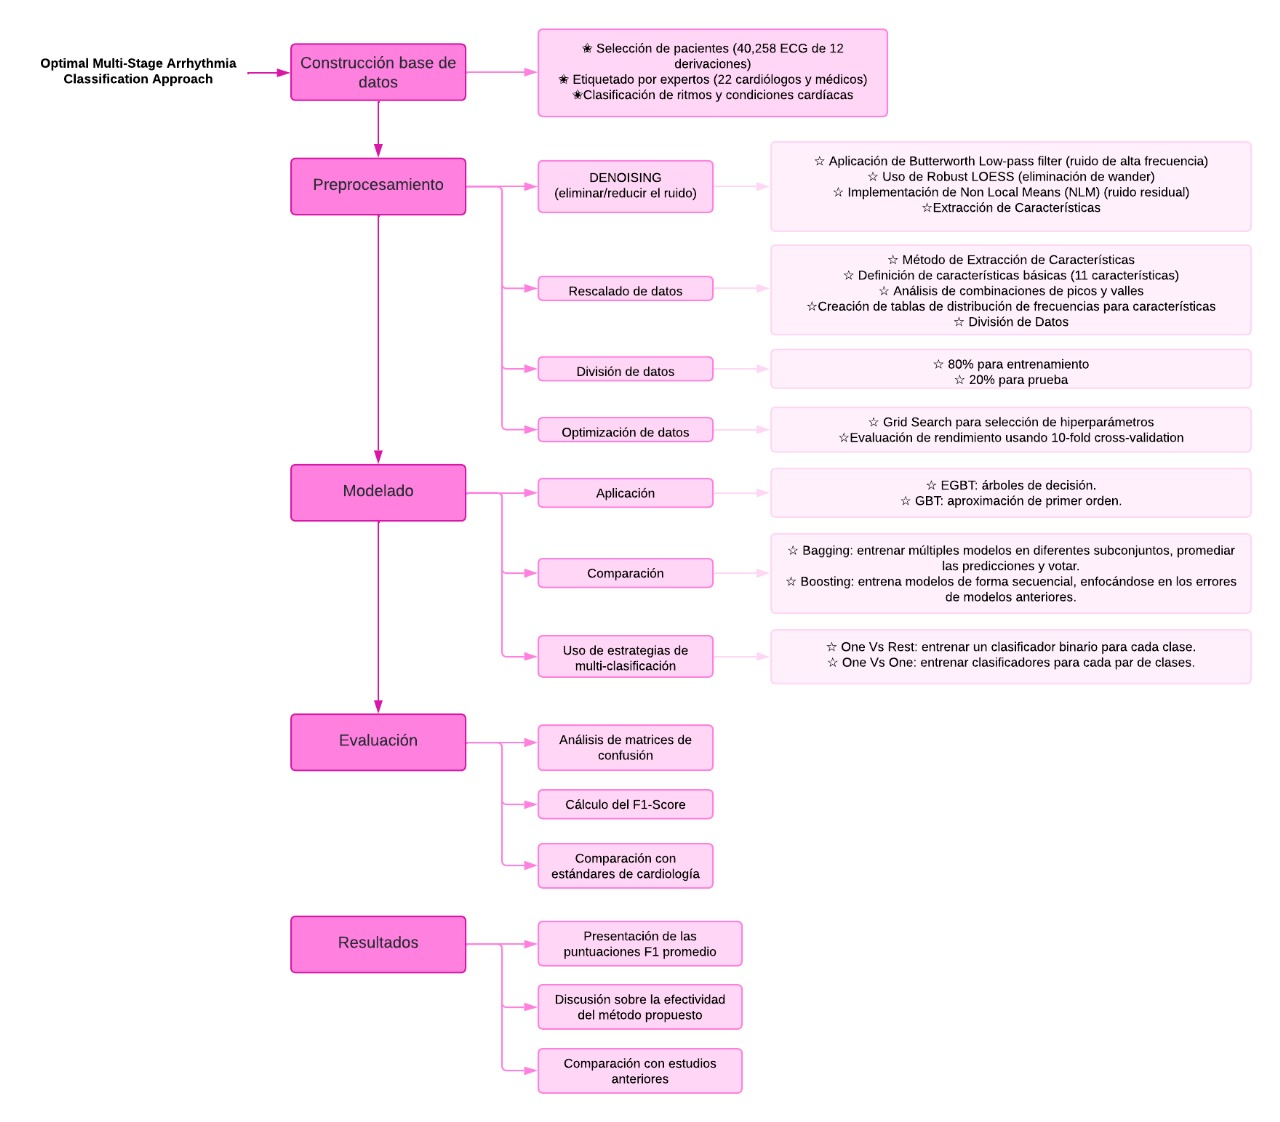

- An Arrhythmia classification approach via deep learning using single-lead ECG without QRS wave detection.
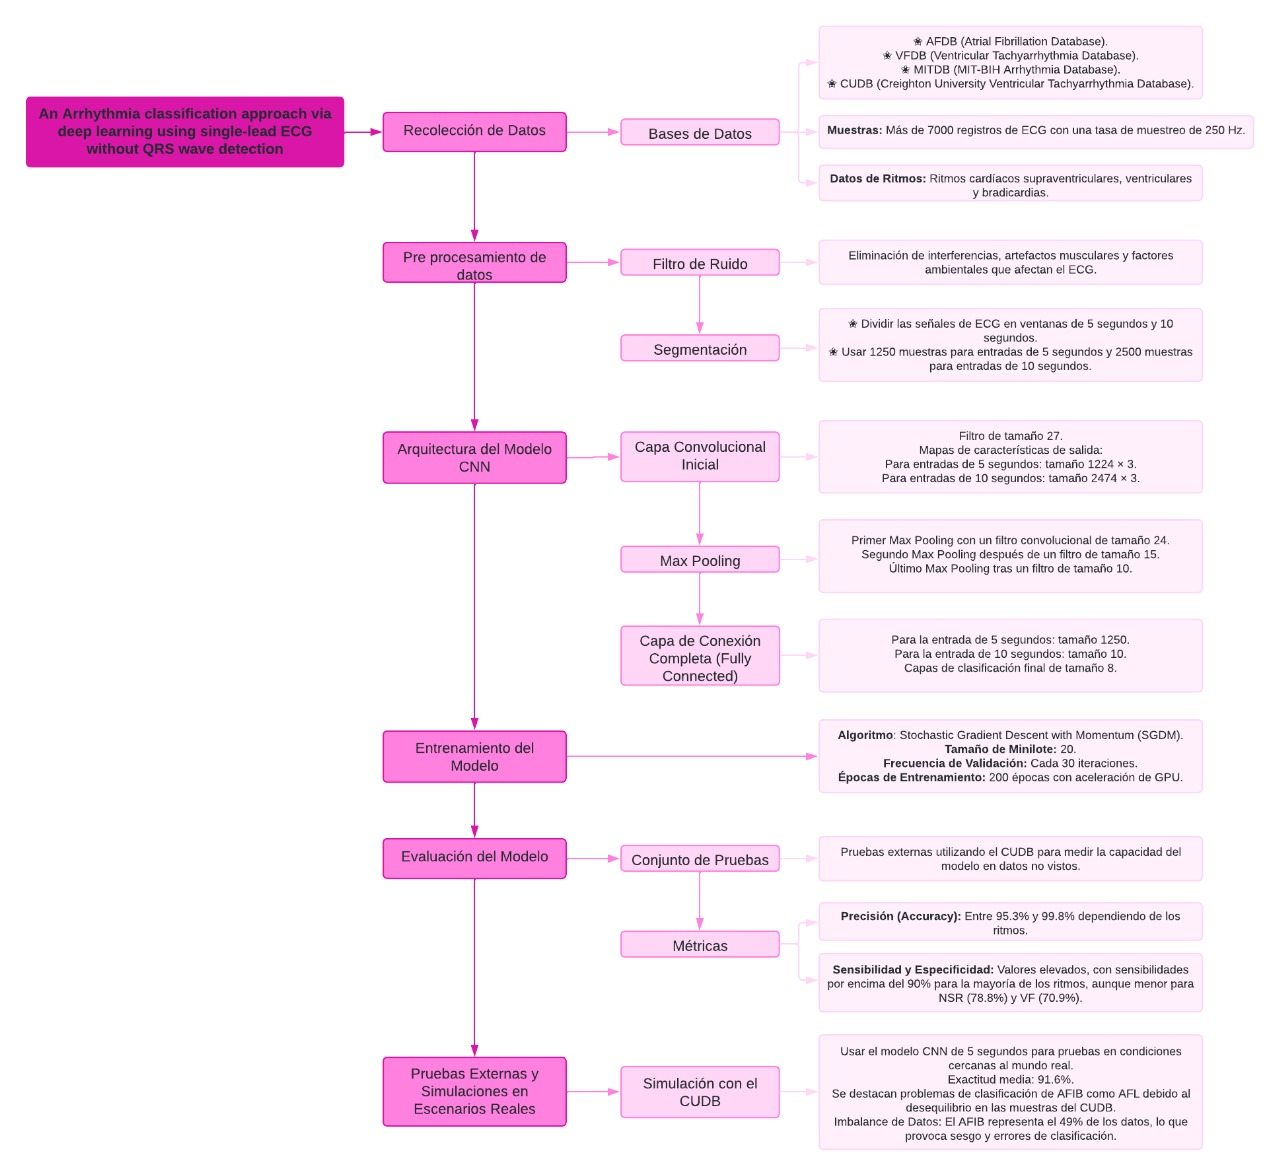

**“Prediction of atrial fibrillation from at-home single-lead ECG signals without arrhythmias”:**

> El objetivo del estudio es predecir la ocurrencia de fibrilación auricular (AF) usando datos de un electrocardiograma (ECG) de un solo canal, esto debido a que hay diagnósticos complejos de hacer, casos en los que, incluso después de un monitoreo, no hay indicios de AF. Se busca hacerlo de manera precisa incluso cuando no hay evidencia de AF durante el monitoreo con un modelo en el que se monitorea a una persona sana por 24 horas. Para esto, los registros se dividieron en tres grupos:
Cohorte de entrenamiento: Registros que contienen casos de AF para que el modelo aprenda a identificar la AF.
Cohorte de calibración: Ajustar el modelo y asegurar que los puntajes de riesgo sean comparables en diferentes grupos de edad.
Cohorte de prueba: Datos que no se usaron en el entrenamiento o calibración para evaluar cómo funciona el modelo.
El modelo se desarrolló en dos etapas, una etapa de extracción de datos en donde se analizan los intervalos entre latidos, se observan anomalías en el ritmo cardíaco y se utilizan redes neuronales para extraer automáticamente 128 características relevantes de segmentos de 10 minutos del ECG. Después de analizarlos, se obtienen varias características (que describen cómo está funcionando el corazón en esos momentos) que son analizadas usando otra red neuronal, una LSTM bidireccional, diseñada para trabajar con secuencias de datos tanto de adelante hacia atrás como de atrás hacia adelante.
Los resultados se calibran para convertirlos en probabilidades de que ocurra AF en un periodo de monitoreo.

> Se procede a hacer un proceso de limpieza para garantizar la calidad de los datos mediante la reducción de ruido y normalización de características para que las métricas tengan escalas comparables.

> Se evalúa el modelo en función de su capacidad para predecir AF usando diferentes conjuntos de características. Se mide su desempeño con las siguientes métricas:
- Área Bajo la Curva (AUC) → Cuanto más cerca esté el AUC de 1, mejor es el modelo para diferenciar entre personas con y sin AF
- Precisión Promedio: Es otra métrica que mide la calidad de las predicciones del modelo. Tiene en cuenta tanto los verdaderos positivos (correctamente identificados) como los falsos positivos (incorrectamente identificados).
- Tiempo de monitoreo.
- Carga de AF → Cuánto tiempo una persona ha estado en fibrilación auricular durante un período de monitoreo

> El estudio concluye que el modelo que utiliza todas las características (incluyendo las derivadas del aprendizaje profundo) muestra un rendimiento superior al de modelos más simples.


**“Optimal Multi-Stage Arrhythmia Classification Approach”:**

> La metodología del artículo ‘Optimal Multi-Stage Arrhythmia Classification Approach’ se centra en mejorar la clasificación de arritmias cardíacas a partir de electrocardiogramas utilizando un enfoque que consta de varias etapas. Primero, para recolectar los datos que van a ayudar al entrenamiento del modelo, se utilizó una nueva base de datos que contiene 40,258 ECGs de 12 derivaciones, incluyendo cerca de 22K hombres y 17K mujeres de dos hospitales en China, con información etiquetada por 22 expertos médicos.

> Como es conocido, cuando se registran señales biológicas como el ECG enfrentamos un gran problema de presencia de ruido no deseado debido a interferencias eléctricas, movimiento del paciente, y otros factores. Para solucionar esto, se desarrolló un enfoque de reducción de ruido en tres etapas:

>- Filtro Butterworth: Elimina ruidos de alta frecuencia (más de 50 Hz).
- Robust LOESS: Elimina la "wandering" (oscilaciones de la línea base) del ECG.
- Non Local Means (NLM): Elimina el ruido residual al suavizar la señal usando patrones similares de otras partes de la señal.

> Después de obtener la señal ECG del paciente, se procedió a la identificación de diferencias de alturas, anchos y prominencias en relación con el tiempo para identificar las características únicas de señal. Además,  se evaluaron diferentes ratios y distribuciones entre estas características para crear un conjunto de datos más interpretable que podría ayudar a identificar arritmias.

> Para su clasificación, se utilizó un modelo "Extreme Gradient Boosting Tree" (EGBT) con un método avanzado de aprendizaje automático, esto, mediante la combinación de árboles de decisión para hacer predicciones más precisas y, además, se realizó una búsqueda exhaustiva para encontrar los mejores ajustes del modelo (hiper parámetros) que maximicen la precisión en la clasificación.

> Finalmente, se compararon 98 enfoques diferentes para ver cuál funcionaba mejor. Se estudió cómo afectaba el uso de ECG de 12 derivaciones en comparación con una sola derivación, encontrando que la precisión aumentaba con los 12.

> Se descubrió que el método propuesto no solo supera la precisión de los modelos anteriores, sino que también alcanzaba una precisión similar a la de cardiólogos profesionales.


**“An Arrhythmia classification approach via deep learning using single-lead ECG without QRS wave detection”:**

> Los autores usaron señales de ECG (electrocardiogramas) de varias bases de datos públicas que contenían diferentes tipos de ritmos cardíacos, como son: ritmos de la parte superior del corazón, ritmos de la parte inferior del corazón y latidos del corazón muy lentos. Dado que las señales de ECG son señales que contienen mucho ruido a causa del movimiento y factores externos, se procede a limpiarla mediante un filtro y dividirla en fragmentos más pequeños de 5 segundos o 10 segundos de duración para poder entrenar el modelo con partes más manejables de la señal en lugar de trabajar con toda la secuencia de ECG a la vez.

> Los investigadores crearon una CNN que es un tipo de inteligencia artificial utilizada para analizar datos de imágenes o señales, hicieron lo siguiente:
- Empezaron con capas que detectan patrones en las señales del corazón.
- Luego, usaron capas llamadas "max pooling" que reducen la cantidad de información, pero mantienen los patrones importantes.
- Finalmente, usaron una capa de "clasificación" que decide qué tipo de arritmia o ritmo está presente en cada segmento de ECG.

> El modelo fue "entrenado" usando datos conocidos de ECG, es decir, le mostraron al modelo muchos ejemplos de señales de ECG junto con el tipo de arritmia que tenían, para que aprendiera a identificarlas por sí solo. Utilizaron un proceso llamado "Gradient Descent" que ajusta el modelo para mejorar su precisión a medida que se entrena. El entrenamiento fue repetido durante 200 veces para asegurarse de que el modelo aprendiera bien.

> Después de entrenar el modelo, probaron su precisión con datos nuevos para ver si realmente podía identificar correctamente las arritmias. El modelo alcanzó una alta precisión, identificando correctamente los ritmos cardíacos con una precisión del 91.6% cuando se usó en situaciones cercanas a las del mundo real.

> Probaron el modelo en una base de datos llamada CUDB que contiene situaciones más complejas. El modelo pudo detectar correctamente la mayoría de las arritmias, pero también encontraron algunos errores, ya que, descubrieron que había muchos más ejemplos de algunos tipos de ritmos que de otros en la base de datos, lo que hizo que el modelo cometiera más errores con ciertos ritmos menos representados.

> Finalmente, compararon su modelo con otros métodos de detección de arritmias. Aunque otros estudios también usaban redes neuronales, pocos habían trabajado con ECG de un solo electrodo (una sola derivación), como el que ellos usaron.


## Segunda parte:

De la base de datos proporcionada por https://figshare.com/collections/ChapmanECG/4560497/1 extraer los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation).

El siguiente codigo permite obtener del archivo zip, la carpeta de archivos que usaremos para el proyecto, solo es necesario correr 1 vez ya que la base de datos comprimida se encuentra en la carpeta Drive del proyecto:

```
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')

# Ruta al archivo zip en Google Drive
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/Proyecto2/ECGDataDenoised.zip'

# Directorio donde se extraerá el archivo zip
extract_path = '/content/drive/MyDrive/Colab Notebooks/Proyecto2/'

# Verificar si el archivo zip existe
if os.path.exists(zip_file_path):
  # Descomprimir el archivo zip
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
  print('Archivo descomprimido correctamente.')
else:
  print('El archivo ECGDataDenoised.zip no se encontró en la ruta especificada.')
```



Con el siguiente codigo podemos realizar una busqueda en el archivo Diagnostics.xlsx, con el cuál podemos obtener los directorios de los archivos que pertecen a los pacientes de interés.

In [ ]:
from google.colab import drive
import pandas as pd
import os

drive.mount('/content/drive') # Montamos el Google Drive para acceder a los datos de este
diagnostics_ruta = '/content/drive/MyDrive/Colab Notebooks/Proyecto2/Diagnostics.xlsx' # Ruta al archivo Excel "Diagnostics"
diagnostics = pd.read_excel(diagnostics_ruta) # Leemos los datos del archivo Excel

# Obtener los valores de la primera y segunda columna
columna1 = diagnostics.iloc[:, 0].tolist()
columna2 = diagnostics.iloc[:, 1].tolist()

# Crear listas de directorios
directoriosSB = []
directoriosAFIB = []

for i in range(len(columna1)):
    if columna2[i] == 'SB':
      if columna1[i] != 'MUSE_20180113_124215_52000': # Eliminamos el archivo con menos de 5000 datos
        directoriosSB.append(columna1[i])
    elif columna2[i] == 'AFIB':
        directoriosAFIB.append(columna1[i])

print(f"Tamaño de la lista directorios SB: {len(directoriosSB)}")
print(f"Tamaño de la lista directorios AFIB: {len(directoriosAFIB)}")

Mounted at /content/drive
Tamaño de la lista directorios SB: 3888
Tamaño de la lista directorios AFIB: 1780


De estos registros los análisis para el presente proyecto deben hacerse en la derivación II.

Tal derivación, corresponde a la segunda columna de los "*.CSV".

A continuación podremos encontrar al menos una gráfica de la información dada por los directorios de SB y AFIB.

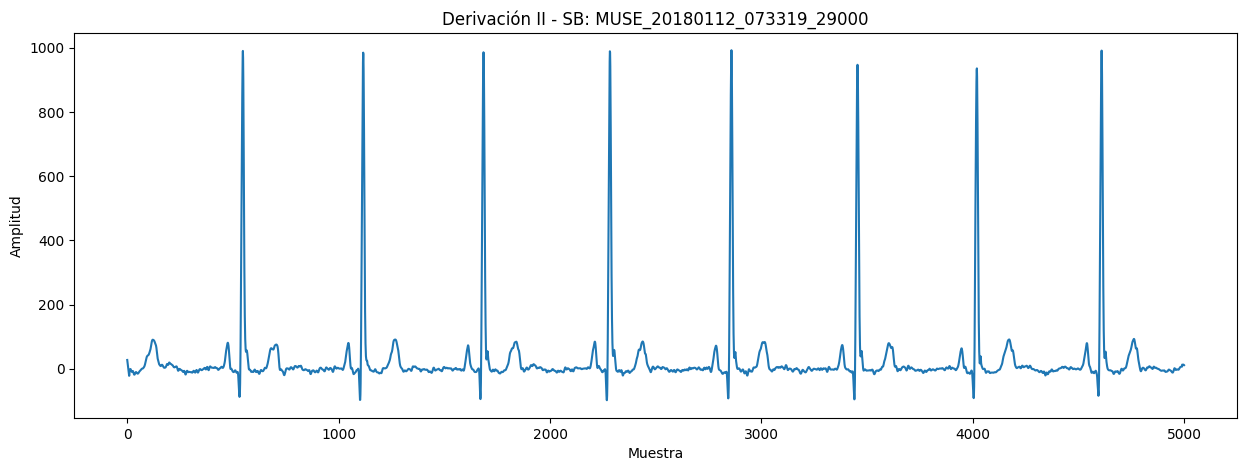

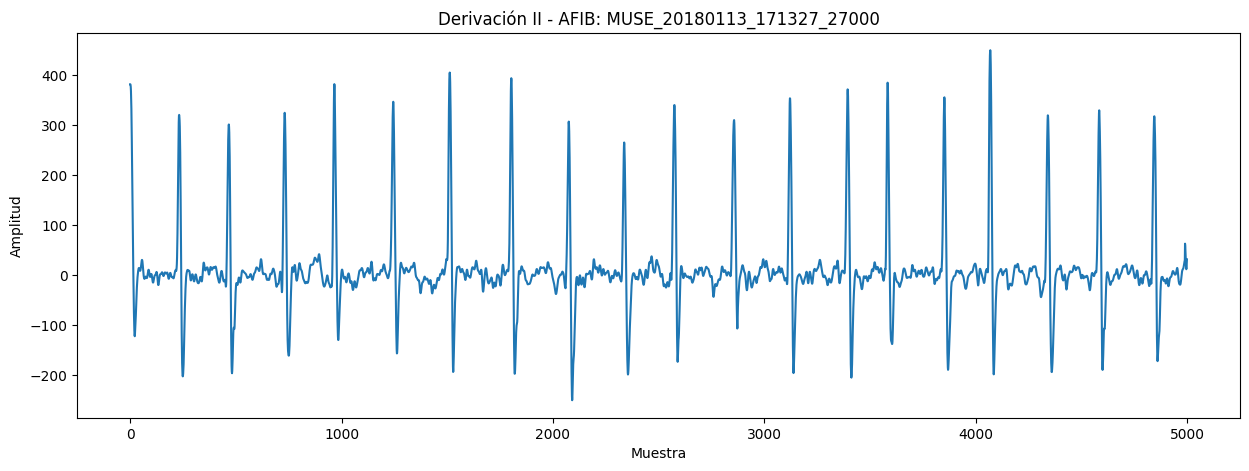

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Creamos una función para graficar la derivación II
def graficarDerivacion(directorios, tipo):
    for directorio in directorios[:1]:  # Puedes ajustar el número de archivos a observar
        csv_ruta = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyecto2/ECGDataDenoised/', directorio + '.csv')  # Construye la ruta al archivo .csv

        try:
            df = pd.read_csv(csv_ruta, header=None, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])  # Lee el archivo .csv

            # Grafica la columna II
            plt.figure(figsize=(15, 5))
            plt.plot(df['II'])
            plt.title(f'Derivación II - {tipo}: {directorio}')
            plt.xlabel('Muestra')
            plt.ylabel('Amplitud')
            plt.show()

        except FileNotFoundError:
            print(f"Archivo no encontrado: {csv_ruta}")

# Graficar para ambos tipos de datos
graficarDerivacion(directoriosSB, 'SB')
graficarDerivacion(directoriosAFIB, 'AFIB')


## Tercera parte:

Programar las fórmulas (1) a (4) que se encuentran en el artículo: _Higher order spectral analysis of ECG signals_.

> 3.1. ¿Qué significa el biespectro? ¿Cuál es su utilidad?

> El biespectro es una herramienta matemática utilizada para analizar señales que contienen múltiples componentes de frecuencia. Mientras que un espectro de potencia (usado en análisis de señales) solo mide la fuerza o potencia de cada frecuencia en una señal, el biespectro va un paso más allá: mide cómo se relacionan entre sí las diferentes frecuencias en la señal. Esto es importante porque no solo detecta las frecuencias presentes en una señal, sino que también puede identificar relaciones complejas entre estas frecuencias, como acoplamientos de fase (cuando las frecuencias están alineadas de una manera específica).

> En términos simples, el biespectro indica si varias frecuencias en la señal están sincronizadas o bien, “trabajando juntas” de alguna manera, lo que no es posible detectar sólo con el espectro de potencia.

> El biespectro es útil porque las arritmias suelen ser señales cardíacas anormales que contienen patrones complejos de frecuencia que varían con el tiempo. Utilizando el biespectro, se pueden identificar interacciones no lineales entre diferentes componentes de frecuencia en una señal de ECG.

> **¿A qué hace referencia las interacciones no lineales?**

> Hace referencia a las diferentes frecuencias que componen la señal del corazón que no se comportan de manera simple o predecible.
En una interacción lineal, las frecuencias se combinan de manera directa y predecible: si tienes dos frecuencias, sus efectos en la señal se suman de manera simple. Pero en una interacción no lineal, las frecuencias pueden afectarse entre sí de maneras más complejas. Esto podría crear nuevas frecuencias o patrones en la señal que no estarían presentes en una interacción lineal.

> En el caso de una señal de ECG, estas interacciones no lineales podrían surgir cuando el corazón no funciona de manera normal, como en el caso de una arritmia. Estas interacciones complejas entre frecuencias son difíciles de detectar con métodos simples.

> En un corazón normal, las frecuencias en el ECG pueden estar alineadas de una manera estable, pero cuando hay una arritmia, estas relaciones pueden volverse inestables o presentar acoplamientos extraños entre frecuencias, lo cual el biespectro puede detectar.

> Por otro lado, la bicoherencia corresponde a la sección  normalizada del biespectro, cumpliendo con el rol de indicador del acoplamiento de fase, esto debido a que el biespectro requiere de una cantidad compleja, donde su versión real se expresa mediante la coherencia cuyos valores máximos de 1 y 0 señalan el acoplamiento y desacoplamiento extremo [5].

> **Aplicaciones del biespectro en ECG:**

> - Detectar acoplamientos de fase entre frecuencias en la señal del corazón → identificar patrones anormales que indican una arritmia.
- Suprimir ruido de origen gaussiano, mejorando la claridad de la señal ECG, lo que facilita la identificación de irregularidades.
- Identificar no linealidades en la señal ECG, que son comunes en condiciones anormales del corazón como las arritmias.

> Para profundizar en una de las aplicaciones del biespectro se resalta la investigación presentada en el artículo “Bispectrum Analysis of Focal Ischemic Cerebral EEG Signal Using Third-Order Recursion Method” en la cual se ejecuta un análisis biespectral del EEG por medio del método de recursión de tercer orden, en el artículo se resalta que ciertas características del biespectro son más sensibles a la detección de la lesión cerebral isquémica focal debido a que los centros ponderados y magnitudes del biespectro varían de acuerdo a la región lesionada, este comportamiento indica que el análisis biespectral del EEG es una  herramienta útil para la diferenciación y medida de extensión de regiones isquémicas [4].

> **¿Cómo se ve una gráfica de biespectro?**

> Una gráfica de bispectro es una representación bidimensional que muestra la relación entre diferentes frecuencias de una señal. El eje horizontal representa una frecuencia (f1) mientras que el eje vertical representa otra frecuencia (f2). Cada punto en la gráfica corresponde a una combinación de estas dos frecuencias.

> La intensidad del color o la altura de los picos en la gráfica indica la magnitud o correlación del bispectro en esa combinación de frecuencias. Un color más intenso indica una mayor magnitud del bispectro para esa combinación de frecuencias (f1, f2). Las áreas de mayor intensidad a menudo reflejan interacciones no lineales en la señal analizada, en el caso del ECG, áreas de alta intensidad pueden estar asociadas con patrones específicos de actividad cardíaca o anomalías

> El bispectro es generalmente simétrico con respecto a la diagonal (f1 = f2). Esto se debe a que el bispectro se basa en el producto de las componentes de frecuencia, y el orden de multiplicación no importa.
Con el fin de analizar adecuadamente las gráficas obtenidas se debe profundizar en las características propias de las enfermedades evaluadas. Para el caso de la bradicardia sinusal SB, se observan comportamientos del ritmo cardíaco lentos esto debido a que el nodo sinoauricular envía la señal eléctrica en una cantidad menor al promedio de 60 veces por minuto, esta puede acarrear complicaciones si el corazón no puede bombear la cantidad suficiente de sangre rica en oxígeno al cuerpo [https://myhealth.ucsd.edu/Spanish/Encyclopedia/134,583es#:~:text=la%20bradicardia%20sinusal-,La%20bradicardia%20sinusal%20es%20un%20tipo%20de%20ritmo%20card%C3%ADaco%20lento,que%20hay%20un%20problema%20subyacente.].

> Por medio de lo anterior, al observar la gráfica de bicoherencia propia de SB es posible indicar que las zonas de tono amarillo reflejan una bicoherencia alta entre las fecuencias f1 y f2 las cuales se concentran en rangos bajos de frecuencia, patrón relacionado con la disminución de la actividad cardíaca (comportamiento lento) propia de esta patología. Además, es importante señalar la distribución triangular, y simétrica de los datos sugiriendo la presencia de interacciones no lineales en las frecuencias bajas y una mayor estabilidad en su comportamiento eléctrico.

> Por otro lado, la fibrilación auricular se define como un ritmo cardíaco irregular y rápido conocido como arritmia, esta puede ocasionar la presencia de coágulos sanguíneos en el corazón y aumentar las probabilidades de padecer insuficiencia cardíaca o accidentes cerebrovasculares, en esta patología las aurículas laten de manera caótica y desincronizada con los ventrículos llegando a generar latidos fuertes y veloces, siendo esto ocasionado por la recepción caótica de señales eléctricas provenientes de distintas direcciones que recibe finalmente el nodo auriculoventricular [https://www.mayoclinic.org/es/diseases-conditions/atrial-fibrillation/symptoms-causes/syc-20350624].

> Teniendo en cuenta la información anterior y al analizar el gráfico de bicoherencia de AFIB obtenido, se observa que el acoplamiento no lineal tiene lugar en un rango más amplio de frecuencias, donde las combinaciones de f1 y f2 que presentan altos valores de bicoherencia están dispersos y fragmentados, señalando el comportamiento irregular propio de esta patología puesto que se refleja la desorganización de los impulsos eléctricos, adicionalmente los tonos oscuros de (verdes o azulados) señalan combinaciones de frecuencias no acopladas permitiendo concluir que no todas las frecuencias interactúan de forma coherente entre sí, por medio de este hecho se resalta que los bajos niveles de bicoherencia reflejan la desincronización del ritmo cardíaco que como se expresó anteriormente se halla ligado a la carencia de sincronía entre las cavidades del corazón.


### *Formula 1: Detrending*

"The deviation δ(n) of original signal x(0) from the detrended signal x(n), is defined as":

<img src=
     style="display: block; margin: auto;">

In [ ]:
import numpy as np

def ajusteDetrend(datos, grado=2):
  coeficientes = np.polyfit(range(len(datos)), datos, grado)
  valores_ajustados = np.polyval(coeficientes, range(len(datos)))

  datos_detrendeados = datos - valores_ajustados # Datos detrendeados por ajuste
  desviacion = (1/len(datos)) * np.sum((datos - valores_ajustados) ** 2) # Formula (1) del articulo equivalente a la desviación

  return datos_detrendeados, desviacion

### *Formula 2:  Compression*

"It is necessary to bring all the signals into a uniform range for
unbiased comparison before analysis. To achieve this uniformity for all the datasets, we used the method of “compression”, using":

<img src=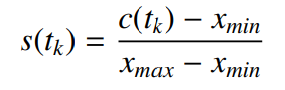
     style="display: block; margin: auto;">

In [ ]:
import numpy as np

def compresion(datos):

    # Encontrando valores máximos y mínimos
    x_min = np.min(datos)
    x_max = np.max(datos)

    # Evitamos la divición por 0
    if x_min == x_max:
        raise ValueError("Los datos solo tienen un unico valor. No es posible hacer la compresión.")

    datos_comprimidos = (datos - x_min) / (x_max - x_min) # Ecuación (2) del articulo equivalente a la compresión de datos

    return datos_comprimidos

Podemos comprobar visualmente las formulas anteriores con un ejemplo sobre las señales:

SB:


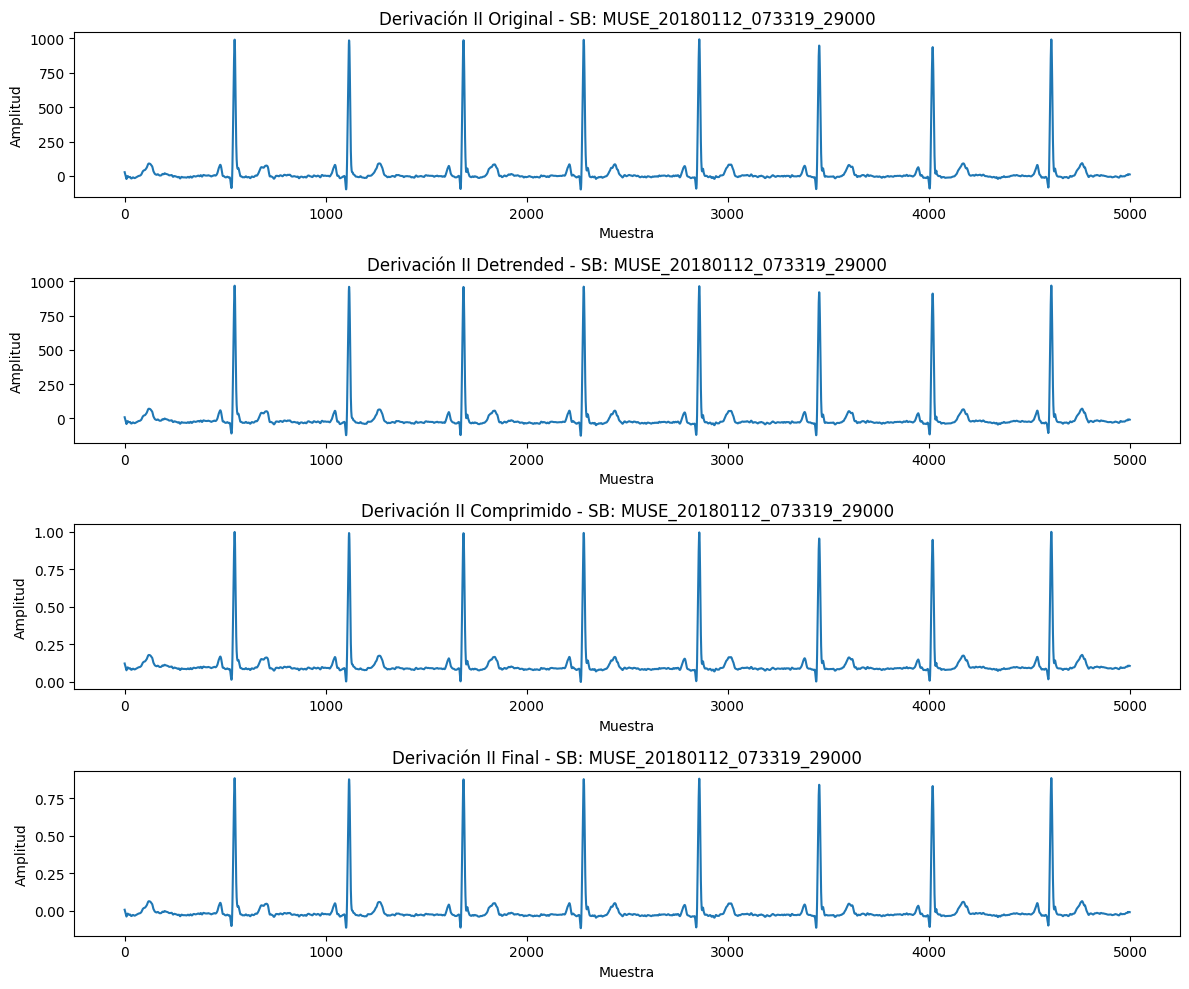

AFIB:


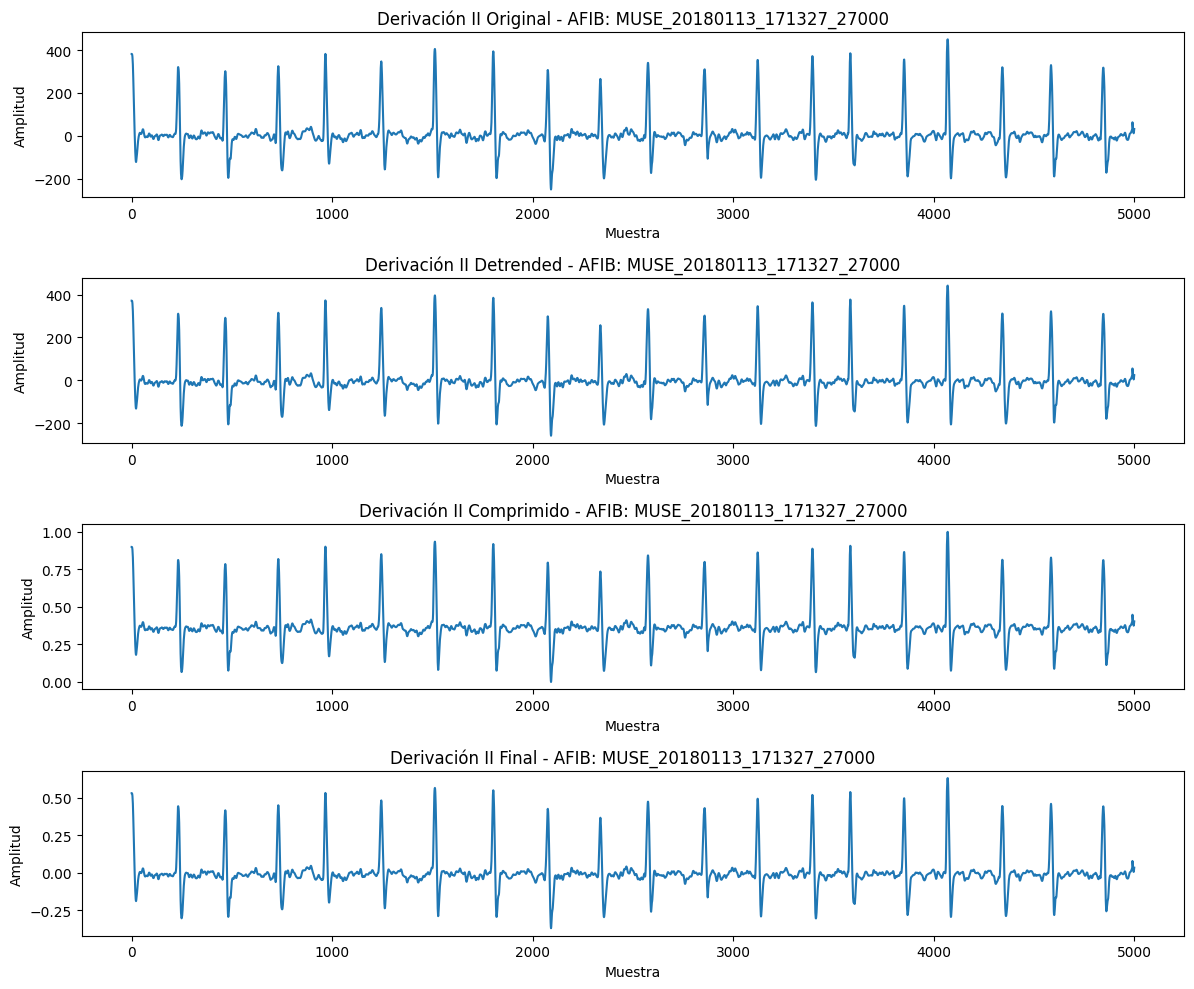

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Función para procesar y graficar derivaciones
def graficarConAjustes(directorios, tipo):
    for directorio in directorios[:1]:  # Puedes ajustar el número de archivos a observar
        csv_file_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyecto2/ECGDataDenoised/', directorio + '.csv')

        try:
            derivaciones = pd.read_csv(csv_file_path, header=None, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

            # Aplica detrend, compresión y detrend nuevamente a la columna II
            dv_detrend, _ = ajusteDetrend(derivaciones['II'])
            dv_detrend_compressed = compresion(dv_detrend)
            dv_completo, _ = ajusteDetrend(dv_detrend_compressed)

            # Grafica la columna II original y las transformaciones
            plt.figure(figsize=(12, 10))

            plt.subplot(4, 1, 1)
            plt.plot(derivaciones['II'])
            plt.title(f'Derivación II Original - {tipo}: {directorio}')
            plt.xlabel('Muestra')
            plt.ylabel('Amplitud')

            plt.subplot(4, 1, 2)
            plt.plot(dv_detrend)
            plt.title(f'Derivación II Detrended - {tipo}: {directorio}')
            plt.xlabel('Muestra')
            plt.ylabel('Amplitud')

            plt.subplot(4, 1, 3)
            plt.plot(dv_detrend_compressed)
            plt.title(f'Derivación II Comprimido - {tipo}: {directorio}')
            plt.xlabel('Muestra')
            plt.ylabel('Amplitud')

            plt.subplot(4, 1, 4)
            plt.plot(dv_completo)
            plt.title(f'Derivación II Final - {tipo}: {directorio}')
            plt.xlabel('Muestra')
            plt.ylabel('Amplitud')

            plt.tight_layout()
            plt.show()

        except FileNotFoundError:
            print(f"Archivo no encontrado: {csv_file_path}")

# Llamar a la función para ambos tipos de datos
print("SB:")
graficarConAjustes(directoriosSB, 'SB')
print("AFIB:")
graficarConAjustes(directoriosAFIB, 'AFIB')

### *Formula 3 & 4: Bispectrum And Bicoherence*

"Bispectral estimation extracts the degree of quadratic phase coupling between individual frequency components of the signal. Then, bispectrum is given by":



"The bicoherence measures the proportion of the signal energy at any frequency pair that is quadratically phase coupled. The bispectrum is then normalized so that is has a magnitude in the range (0,1), to get the corresponding bicoherence, as":



In [ ]:
import numpy as np

def BiespectroYBicoherencia(signal, fs=500, nfft=500):
    # Segmentación de la señal
    segments = []
    indices = range(0, len(signal) - nfft + 1, nfft)
    for i in indices:
        segments.append(signal[i:i + nfft])
    segments = np.array(segments)
    num_segments = segments.shape[0]

    # Cálculo de la FFT de los segmentos
    fft_segments = np.fft.fft(segments, n=nfft, axis=1)
    fft_segments = fft_segments[:, :nfft // 2]

    # Inicialización de matrices para el bispectro y la bicoherencia
    biespectro = np.zeros((nfft // 2, nfft // 2), dtype=complex)
    biespectro2 = np.zeros((nfft // 2, nfft // 2), dtype=complex)

    # Cálculo del bispectro
    for k in range(num_segments):
        S = fft_segments[k, :]
        for f1 in range(nfft // 2):
            for f2 in range(nfft // 2 - f1):
                f3 = f1 + f2
                biespectro[f1, f2] += S[f1] * S[f2] * np.conj(S[f3])
                biespectro2[f1, f2] += np.abs(S[f1] * S[f2] * np.conj(S[f3]))

    # Cálculo de la bicoherencia
    bicoherencia = np.abs(biespectro) / (biespectro2 + 1e-10)  # Evitar división por cero

    return biespectro, bicoherencia

def simetriaBicoherencia(bicoherencia):
    # Inicializar una matriz de simetría
    simetria = np.zeros((10, 20))

    # Rellenar la matriz de simetría
    for f1 in range(20):
        for f2 in range(f1, 20 - f1):
            if f1 <= f2:
                simetria[f1, f2] = np.abs(bicoherencia[f1, f2])
    return simetria

**Explicación de la simetria de la bicoherencia y para qué sirve para graficar:**

> La bicoherencia es una medida estadística utilizada para analizar las relaciones de fase entre diferentes componentes de frecuencia de una señal. Es especialmente útil para identificar interacciones no lineales, donde las señales a diferentes frecuencias pueden combinarse de manera que no es evidente en el análisis lineal. La simetría en la bicoherencia se debe a su invariancia bajo ciertas transformaciones, lo que la hace resistente al ruido y las variaciones en la representación de los datos [1]. Esta simetría es fundamental para graficar relaciones en datos multidimensionales, como señales de EEG, donde puede revelar dinámicas ocultas que los métodos tradicionales no logran identificar [2].

**Aspectos clave:**
> Detección de Interacciones No Lineales:
- La bicoherencia puede identificar interacciones no lineales en sistemas complejos, como la turbulencia en plasma y los datos de EEG [4].
- Permite distinguir entre comportamientos caóticos y cuasi-periódicos, mejorando la comprensión de las dinámicas subyacentes [2].

> Robustez al Ruido:
- La función de bicoherencia extrae efectivamente información de series temporales ruidosas, proporcionando perspectivas que a menudo están ocultas en análisis convencionales [3].
- Esta capacidad es crucial en campos como la astrofísica, donde los datos pueden estar afectados por un ruido significativo [2].

> La simetría en la bicoherencia facilita la representación gráfica de los resultados, ya que permite trazar relaciones consistentes en el plano de frecuencias. Al ser simétrica, simplifica la visualización y la interpretación de patrones de interacción no lineal en los datos, haciendo que sea una herramienta poderosa para el análisis de señales complejas.

Ejemplo de una gráfica de simetria por bicoherencia:

SB:


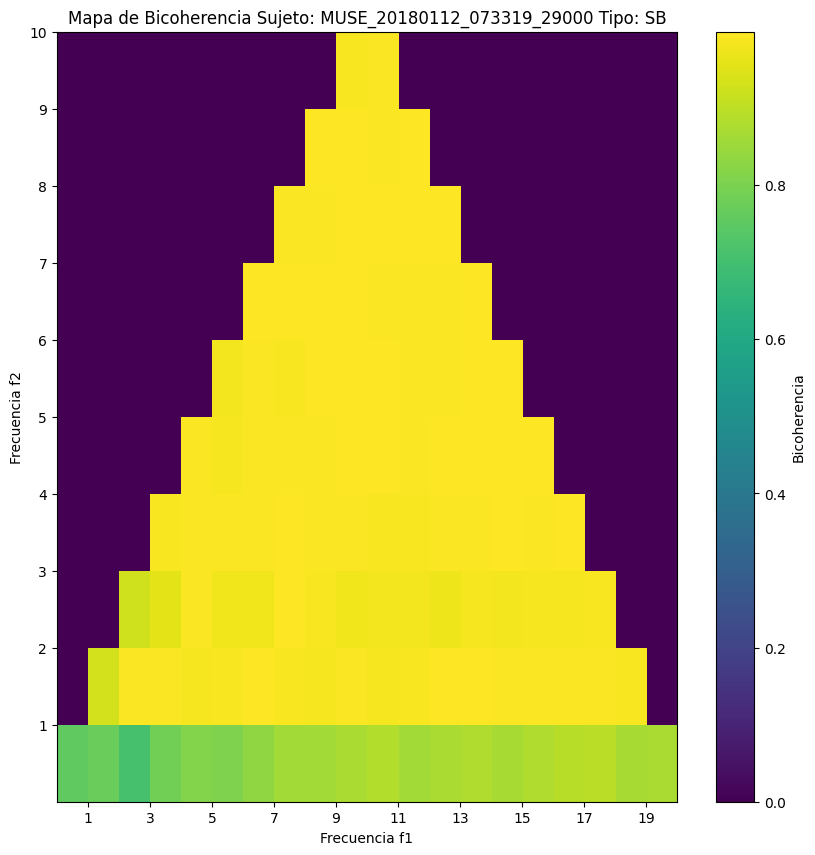

AFIB:


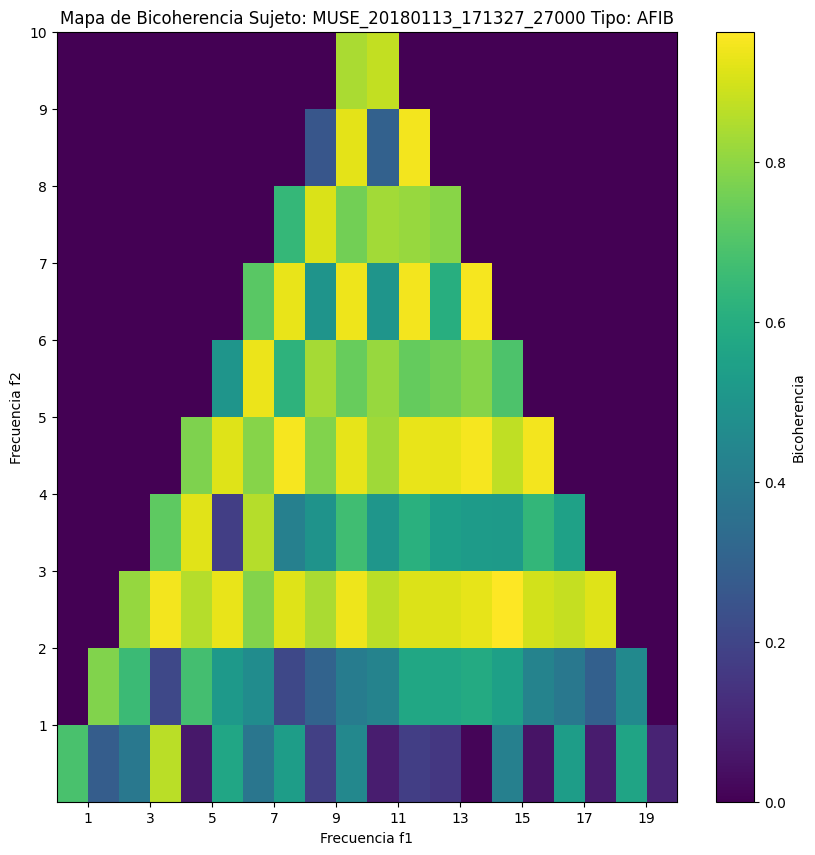

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para procesar y graficar la simetría por bicoherencia
def GraficarSimetriaBicoherencia(directorios, tipo):
    for directorio in directorios[:1]:  # Puedes ajustar el número de archivos a observar
        csv_ruta = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyecto2/ECGDataDenoised/', directorio + '.csv')

        try:
            derivaciones = pd.read_csv(csv_ruta, header=None, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

            # Aplica detrend, compresión y detrend nuevamente a la columna II
            dv_detrend, _ = ajusteDetrend(derivaciones['II'])
            dv_detrend_compressed = compresion(dv_detrend)
            dv_completo, _ = ajusteDetrend(dv_detrend_compressed)

            # Cálculo del bispectro y la bicoherencia
            Biesespectro, Bicoherencia = BiespectroYBicoherencia(dv_completo)

            # Aplicar la simetría a la bicoherencia
            Simetria = simetriaBicoherencia(Bicoherencia)

            # Visualización del mapa de bicoherencia
            plt.figure(figsize=(10, 10))
            plt.imshow(np.abs(Simetria), extent=(0, 20, 0, 10), origin='lower', cmap='viridis', aspect='auto')
            plt.colorbar(label='Bicoherencia')
            plt.title(f'Mapa de Bicoherencia Sujeto: {directorio} Tipo: {tipo}')
            plt.xlabel('Frecuencia f1')
            plt.ylabel('Frecuencia f2')
            plt.xticks(np.arange(1, 21, 2))
            plt.yticks(np.arange(1, 11, 1))
            plt.grid(False)
            plt.show()

        except FileNotFoundError:
            print(f"Archivo no encontrado: {csv_ruta}")

# Llamar a la función para ambos tipos de datos
print("SB:")
GraficarSimetriaBicoherencia(directoriosSB, 'SB')
print("AFIB:")
GraficarSimetriaBicoherencia(directoriosAFIB, 'AFIB')

## Cuarta parte:

Para cada señal extraer la frecuencia que contiene la máxima potencia y gráfiquela.

Vamos a realizar un analisis espectral a los datos completos de cada enfermedad, para observar su comportamiento en frecuencias:

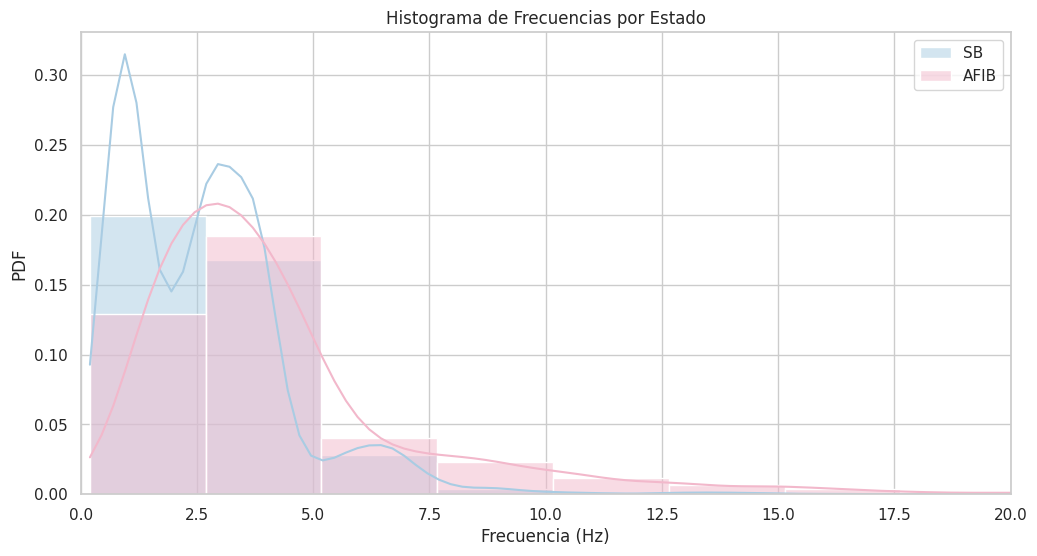

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.fft import fft
from concurrent.futures import ThreadPoolExecutor

# Inicializar listas para almacenar las frecuencias de pico principales
fm_SB = []
fm_AFIB = []

def frecuenciasPicosPrincipales(directorio, estado):
    # Construye la ruta al archivo .csv
    csv_ruta = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyecto2/ECGDataDenoised/', directorio + '.csv')

    # Lee el archivo .csv con pandas y especifica el encabezado
    try:
        derivaciones = pd.read_csv(csv_ruta, header=None, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

        # Aplica detrend a la columna II
        dv_detrend, _ = ajusteDetrend(derivaciones['II'])
        dv_detrend_compressed = compresion(dv_detrend)
        dv_completo, _ = ajusteDetrend(dv_detrend_compressed)

        # Parámetros
        fs = 500  # Frecuencia de muestreo
        X = fft(dv_completo.to_numpy())
        freqs = np.fft.fftfreq(len(dv_completo), 1/fs)
        idx = np.argmax(np.abs(X))
        fm = freqs[idx]

        if estado == 'AFIB':
            fm_AFIB.append(fm)
        else:
            fm_SB.append(fm)

    except FileNotFoundError:
        print(f"Archivo no encontrado: {csv_ruta}")

# Usar ThreadPoolExecutor para procesar archivos en paralelo
with ThreadPoolExecutor() as executor:
    executor.map(lambda d: frecuenciasPicosPrincipales(d, 'AFIB'), directoriosAFIB)
    executor.map(lambda d: frecuenciasPicosPrincipales(d, 'SB'), directoriosSB)

# Crear histogramas usando seaborn
plt.figure(figsize=(12, 6))
# Establecer el estilo de Seaborn
sns.set(style="whitegrid", palette="pastel")

# Histograma de frecuencias para SB
sns.histplot(fm_SB, bins=20, stat='density', kde=True, color='#A9CCE3', label='SB', alpha=0.5)
sns.histplot(fm_AFIB, bins=20, stat='density', kde=True, color='#F2B8CB', label='AFIB', alpha=0.5)

# Configuración de la gráfica
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PDF')
plt.title('Histograma de Frecuencias por Estado')
plt.xlim(0, 20)
plt.legend()
plt.show()

**Al extraer el fMP de cada grupo patológico analizado, se indica que el grupo de SB presenta picos máximos de potencia en intervalos reducidos de frecuencia abarcando rangos de 0 a 5 Hz aproximadamente, sus componentes frecuenciales presentan una concentración densa y equilibrada en este límite reducido. Por otro lado para el caso de AFIB se observa una distribución frecuencial desordenada y amplia, cuyos valores de frecuencia de máxima potencia se distribuyen en rangos frecuenciales bajos e intermedios.**

## Quinta parte:

Para cada señal sumar el número de frecuencias que son significativas para bicoherencia cuales tienen un valor superior a:

$$
\sqrt{\frac{9.2}{2 \cdot N}}
$$


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función para contar frecuencias significativas en la bicoherencia
def contarFrecuenciasSignificativas(Bicoherencia, N):
    umbral = np.sqrt((9.2) / (2 * N))
    num_frecuencias_significativas = np.sum(Bicoherencia > umbral)
    return num_frecuencias_significativas

# Función para procesar el número de frecuancias significativas
def aplicarContarFrecuencias(directorios, tipo, N):
    for directorio in directorios[:1]:  # Puedes ajustar el número de archivos a observar
        csv_ruta = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyecto2/ECGDataDenoised/', directorio + '.csv')

        try:
            derivaciones = pd.read_csv(csv_ruta, header=None, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

            # Aplica detrend, compresión y detrend nuevamente a la columna II
            dv_detrend, _ = ajusteDetrend(derivaciones['II'])
            dv_detrend_compressed = compresion(dv_detrend)
            dv_completo, _ = ajusteDetrend(dv_detrend_compressed)

            # Cálculo del bispectro y la bicoherencia
            Biesespectro, Bicoherencia = BiespectroYBicoherencia(dv_completo)

            # Aplicar la simetría a la bicoherencia
            Simetria = simetriaBicoherencia(Bicoherencia)

            # Contar el número de frecuencias significativas en la bicoherencia
            num_frecuencias_significativas = contarFrecuenciasSignificativas(Simetria, N)
            print(f'Número de frecuencias significativas para el archivo {directorio}: {num_frecuencias_significativas}')

        except FileNotFoundError:
            print(f"Archivo no encontrado: {csv_ruta}")

# Llamar a la función para ambos tipos de datos
print("SB:")
aplicarContarFrecuencias(directoriosSB, 'SB', N=10)
print("AFIB:")
aplicarContarFrecuencias(directoriosAFIB, 'AFIB', N=10)

SB:
Número de frecuencias significativas para el archivo MUSE_20180112_073319_29000: 110
AFIB:
Número de frecuencias significativas para el archivo MUSE_20180113_171327_27000: 56


## Sexta parte:

Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 3 al 5 y almacene los resultados en un dataframe donde se pueda registro, tipo de patología y el frecuencia de máxima potencia (fMP) y suma de frecuencias significativas en bicoherencia (sFSB):

| Registro | Estado | fMP | sFSB |
|----------|--------|-----|------|
| ---      | ---    | --- | ---  |
| ---      | ---    | --- | ---  |



In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.fft import fft

def crearDataframe(directorios, tipo):
    # Inicializa una lista para almacenar los resultados
    resultados = []

    for directorio in directorios:
        csv_ruta = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyecto2/ECGDataDenoised/', directorio + '.csv')

        try:
            derivaciones = pd.read_csv(csv_ruta, header=None, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

            # Procesamiento de la columna II
            dv_detrend, _ = ajusteDetrend(derivaciones['II'])
            dv_detrend_compressed = compresion(dv_detrend)
            dv_completo, _ = ajusteDetrend(dv_detrend_compressed)

            # Cálculo del bispectro y la bicoherencia
            Biesespectro, Bicoherencia = BiespectroYBicoherencia(dv_completo)

            # Aplicar simetría a la bicoherencia
            Simetria = simetriaBicoherencia(Bicoherencia)

            # Encontrar la frecuencia de máxima potencia
            fs = 500  # Frecuencia de muestreo
            X = fft(dv_completo.to_numpy())
            freqs = np.fft.fftfreq(len(dv_completo), 1/fs)
            fMP = freqs[np.argmax(np.abs(X))]

            # Contar el número de frecuencias significativas en la bicoherencia
            N = 10  # Número de frecuencias a considerar
            sFBS = contarFrecuenciasSignificativas(Simetria, N)

            # Agregar los resultados a la lista
            resultados.append({'Registro': directorio, 'Estado': tipo, 'fMP': fMP, 'sFSB': sFBS})

        except FileNotFoundError:
            print(f"Archivo no encontrado: {csv_ruta}")

    # Crear el DataFrame solo una vez al final
    df = pd.DataFrame(resultados)
    return df

# Llamar a la función para ambas
print("SB:")
dfSB = crearDataframe(directoriosSB, 'SB')
display(dfSB)
print("AFIB:")
dfAFIB = crearDataframe(directoriosAFIB, 'AFIB')
display(dfAFIB)

SB:


,Registro,Estado,fMP,sFSB
0,MUSE_20180112_073319_29000,SB,2.6,110
1,MUSE_20180113_121940_44000,SB,0.9,91
2,MUSE_20180112_120347_79000,SB,3.8,73
3,MUSE_20180114_075128_92000,SB,1.0,90
4,MUSE_20180118_174026_42000,SB,2.9,90
...,...,...,...,...
3883,MUSE_20180114_070348_17000,SB,2.8,87
3884,MUSE_20180114_134724_10000,SB,2.8,90
3885,MUSE_20180113_122544_20000,SB,0.9,73
3886,MUSE_20180114_074720_85000,SB,15.3,90


AFIB:


,Registro,Estado,fMP,sFSB
0,MUSE_20180113_171327_27000,AFIB,9.0,56
1,MUSE_20180114_075026_69000,AFIB,4.2,55
2,MUSE_20180113_133901_16000,AFIB,4.0,88
3,MUSE_20180116_123940_90000,AFIB,9.7,81
4,MUSE_20180114_075003_61000,AFIB,4.3,25
...,...,...,...,...
1775,MUSE_20180116_120939_86000,AFIB,3.4,77
1776,MUSE_20180114_134126_54000,AFIB,2.9,85
1777,MUSE_20180115_131040_20000,AFIB,3.3,99
1778,MUSE_20180116_170450_55000,AFIB,2.9,58


In [ ]:
df_completo = pd.concat([dfSB, dfAFIB], ignore_index=True)
display(df_completo)

,Registro,Estado,fMP,sFSB
0,MUSE_20180112_073319_29000,SB,2.6,110
1,MUSE_20180113_121940_44000,SB,0.9,91
2,MUSE_20180112_120347_79000,SB,3.8,73
3,MUSE_20180114_075128_92000,SB,1.0,90
4,MUSE_20180118_174026_42000,SB,2.9,90
...,...,...,...,...
5663,MUSE_20180116_120939_86000,AFIB,3.4,77
5664,MUSE_20180114_134126_54000,AFIB,2.9,85
5665,MUSE_20180115_131040_20000,AFIB,3.3,99
5666,MUSE_20180116_170450_55000,AFIB,2.9,58


## Septima parte:
Realizar un informe que permita evidenciar las diferencias entre las señales SB y AFIB utilizando las herramientas de estadística descriptiva.


Estadísticas de fMP por Estado:


,mean,std,min,max
Estado,,,,
AFIB,4.289888,3.283116,0.2,50.0
SB,2.690381,2.380511,0.2,50.0



Estadísticas de sFSB por Estado:


,mean,std,min,max
Estado,,,,
AFIB,69.236517,17.225800,2,110
SB,84.840021,9.578518,27,110


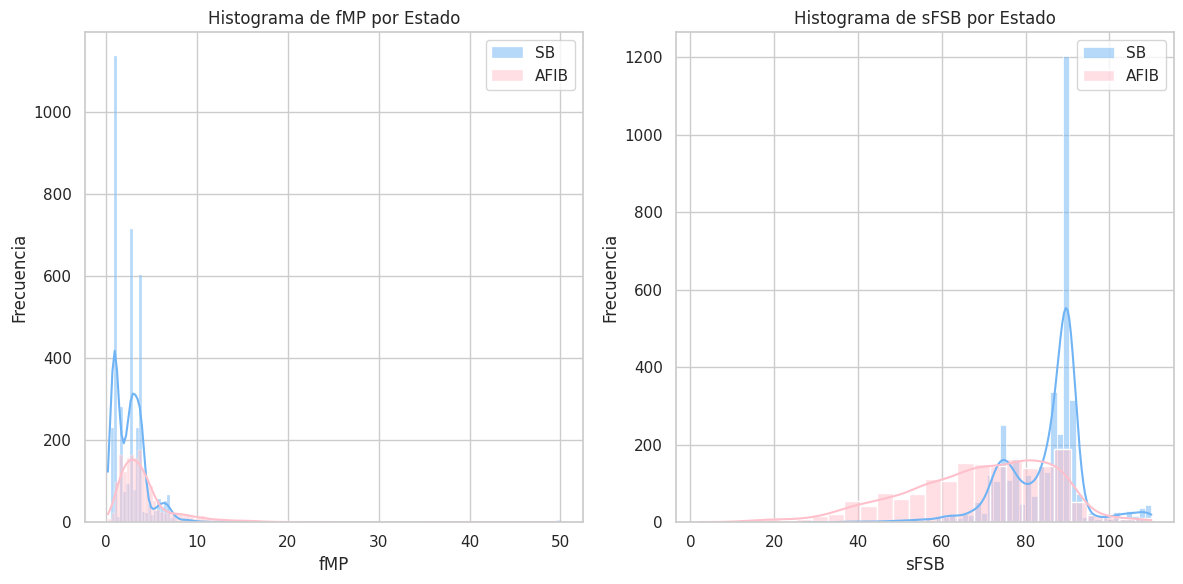

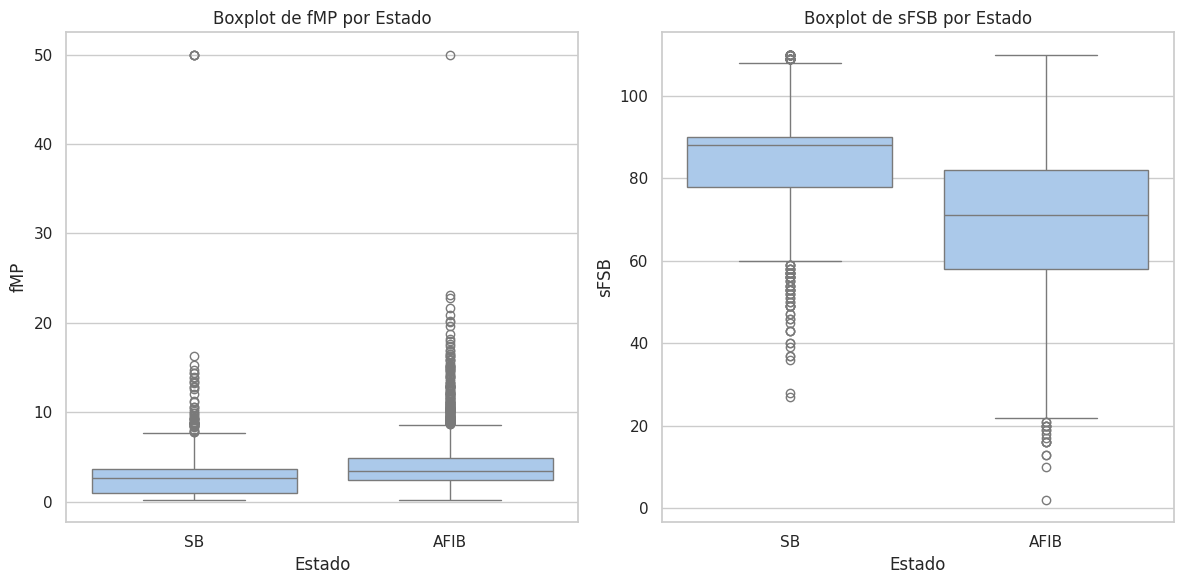


Coeficiente de variación fMP SB: 0.8847093575769419
Coeficiente de variación sFSB SB: 0.11288641736145202
Coeficiente de variación fMP AFIB: 0.7651001955246471
Coeficiente de variación sFSB AFIB: 0.24872655552791043


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas agrupadas por estado en el dataframe completo
estadisticas_fmp = df_completo.groupby('Estado')['fMP'].agg(['mean', 'std', 'min', 'max'])
estadisticas_sfbs = df_completo.groupby('Estado')['sFSB'].agg(['mean', 'std', 'min', 'max'])

# Mostrar estadísticas agrupadas
print("\nEstadísticas de fMP por Estado:")
display(estadisticas_fmp)
print("\nEstadísticas de sFSB por Estado:")
display(estadisticas_sfbs)

# Histogramas de fMP y sFSB por estado
plt.figure(figsize=(12, 6))

# Establecer el estilo de Seaborn
sns.set(style="whitegrid", palette="pastel")

# Histograma de fMP para SB y AFIB
plt.subplot(1, 2, 1)
sns.histplot(df_completo[df_completo['Estado'] == 'SB']['fMP'], label='SB', kde=True, color='#70B4F5', alpha=0.5)
sns.histplot(df_completo[df_completo['Estado'] == 'AFIB']['fMP'], label='AFIB', kde=True, color='pink', alpha=0.5)
plt.xlabel('fMP')
plt.ylabel('Frecuencia')
plt.title('Histograma de fMP por Estado')
plt.legend()

# Histograma de sFSB para SB y AFIB
plt.subplot(1, 2, 2)
sns.histplot(df_completo[df_completo['Estado'] == 'SB']['sFSB'], label='SB', kde=True, color='#70B4F5', alpha=0.5)
sns.histplot(df_completo[df_completo['Estado'] == 'AFIB']['sFSB'], label='AFIB', kde=True, color='pink', alpha=0.5)
plt.xlabel('sFSB')
plt.ylabel('Frecuencia')
plt.title('Histograma de sFSB por Estado')
plt.legend()

plt.tight_layout()
plt.show()

# Boxplots de fMP y sFSB por estado
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Estado', y='fMP', data=df_completo)
plt.title('Boxplot de fMP por Estado')

plt.subplot(1, 2, 2)
sns.boxplot(x='Estado', y='sFSB', data=df_completo)
plt.title('Boxplot de sFSB por Estado')

plt.tight_layout()
plt.show()

# Cálculo del coeficiente de variación para fMP y sFSB
cv_fmp_sb = np.std(dfSB['fMP']) / np.mean(dfSB['fMP'])
cv_sfbs_sb = np.std(dfSB['sFSB']) / np.mean(dfSB['sFSB'])
cv_fmp_afib = np.std(dfAFIB['fMP']) / np.mean(dfAFIB['fMP'])
cv_sfbs_afib = np.std(dfAFIB['sFSB']) / np.mean(dfAFIB['sFSB'])

print(f"\nCoeficiente de variación fMP SB: {cv_fmp_sb}")
print(f"Coeficiente de variación sFSB SB: {cv_sfbs_sb}")
print(f"Coeficiente de variación fMP AFIB: {cv_fmp_afib}")
print(f"Coeficiente de variación sFSB AFIB: {cv_sfbs_afib}")

**Analisis de histogramas:**

> Para el histograma de frecuencias de máxima potencia (FMP) elaborado mediante estadística descriptiva se resaltan los siguientes aspectos:
- La distribución para la bradicardia sinusal se halla más concentrada en un rango de frecuencias bajas que abarca un intervalo de 0 hasta aproximadamente 7 Hz, donde los picos máximos que alcanzan magnitudes desde 600 hasta 1000 siempre se sitúan por debajo de los 10 Hz, esta conducta tiene coherencia con los patrones pertenecientes a esta condición clínica caracterizada por latidos cardíacos lentos.
- Respecto a la patología de AFIB se identifica una distribución dispersa que realiza un barrido mayor de frecuencias en comparación de SB, sin embargo se evidenció una leve preferencia por las frecuencias bajas y la menor aparición de picos pronunciados, razón por la cual cuenta con una curva más suavizada.

> Por otro lado, para el histograma de suma de frecuencias de Sub-Bandas se destacan las siguientes características:
- La condición clínica de SB denota una mayor concentración en valores altos de sFSB (entre un rango de 80 a 100 Hz) indicando que la suma de las frecuencias de las sub-bandas es más alta en comparación de AFIB, esto debido a una mayor coherencia entre las frecuencias de las sub-bandas que le brindan rasgos más ordenados y menos caóticos a la señal eléctrica producida en la bradicardia sinusal.
- La fibrilación auricular se encuentra menos concentrada y la distribución de sus sub-bandas abarca un rango más amplio en el gráfico, comportamiento que puede hablar de la naturaleza desordenada del ritmo cardíaco.


**Analisis de caja de bigotes:**

> Al examinar el gráfico de frecuencia de máxima potencia (FMP) es posible indicar que la longitud de la caja es reducida, hecho que señala una baja variabilidad en la distribución de los datos, adicionalmente ambos grupos patológicos presentaron un leve sesgo hacia el cuartil inferior, indicando predominancia por valores de baja frecuencia.
Es importante resaltar que SB abarca valores de FMP menores en comparación de AFIB no obstante ambas condiciones comparten un intervalo de datos. Agregando a lo anterior, se sobresalta que la condición de AFIB presenta mayor cantidad de valores atípicos, comportamiento que puede ser relacionado con la conducta caótica del ritmo cardíaco.

> Por otra parte para el caso de sFSB se identifica un incremento en la longitud de las cajas de ambos grupos, hecho que refleja el aumento en la variabilidad de la distribución de los datos, adicionalmente las medianas de ambos grupos manifiestan un leve sesgo al cuartil superior. En este punto es importante destacar que la bradicardia sinusal cuenta con una concentración de valores más altos de sFSB en equiparación con AFIB, dichos datos se sitúan en rangos superiores a 80, suceso que puede ser asociado a la estabilidad de la señal eléctrica que facilita la mayor coherencia entre las frecuencias de las sub-bandas. Finalmente, es necesario mencionar que la longitud de los bigotes del grupo AFIB es más pronunciada en contraposición con el grupo de SB, indicando que esta condición clínica abarca mayores espectros de frecuencia, es decir realiza un mayor barrido de frecuencias dando cumplimiento a los efectos caóticos propios de la patología.


**Análisis de estadística descriptiva**

> Por medio del histograma y el diagrama de cajas y bigotes de máxima frecuencia de potencia se reconoce que las medianas de ambos grupos patológicos están concentradas en diferentes intervalos, además la distribución de sus datos se realiza en rangos distintos de frecuencias, donde para la bradicardia sinusal la mayor concentración de frecuencias se da en valores bajos  mientras que para la fibrilación auricular se abarca un rango más dinámico de frecuencias.

> En adición a lo anterior, en el gráfico de sFSB se observó discrepancias entre los grupos de SB y AFIB, puesto que los datos del grupo SB presentan picos marcados hacia altos valores de bicoherencia superiores a 80, sin embargo para el grupo AFIB se evidenció una curva suave y equilibrada que se extendía en un intervalo mayor de valores, hecho que reflejaba la disminución en la coherencia de las frecuencias (conducta caótica).

> Por otra parte, la diferencia en las tendencias centrales de cada grupo encontrada tras realizar la prueba U de Mann Whitney señala que los valores centrales de fMP y sFSB son distintos para SB y AFIB, estipulando que para los sujetos diagnosticados con SB la tendencia apunte a frecuencias más bajas tanto en potencia como en coherencia espectral, mientras que para el grupo AFIB se escatiman valores dispersos que abarcan frecuencias más amplias.

> Finalmente, se debe tener en cuenta que la mayor dispersión de frecuencias pertenecía al grupo AFIB, hecho que en el ámbito estadístico se interpreta con la mayor variabilidad de las características espectrales, por ende, los sujetos del grupo de fibrilación auricular se asocian a espectros más complejos con rasgos menores de bicoherencia en comparación con los patrones vistos en SB.


### Eliminando valores atípicos


Estadísticas de fMP por Estado:


,mean,std,min,max
Estado,,,,
AFIB,3.372143,1.516218,0.2,7.7
SB,2.538736,1.591932,0.6,7.7



Estadísticas de sFSB por Estado:


,mean,std,min,max
Estado,,,,
AFIB,74.352502,12.586134,50,110
SB,85.056911,9.061244,50,110


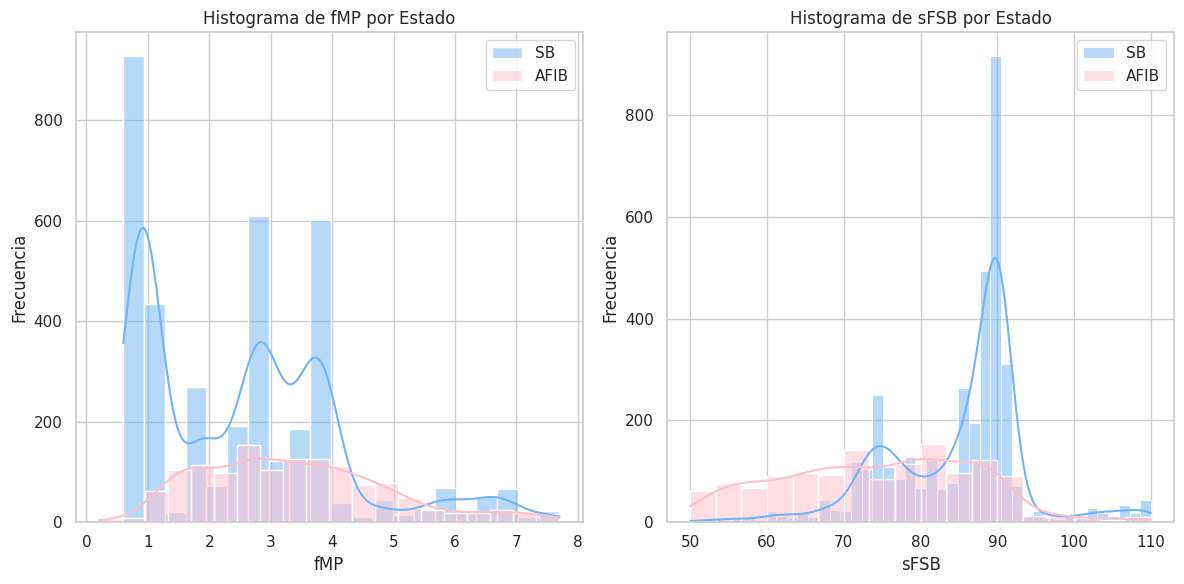

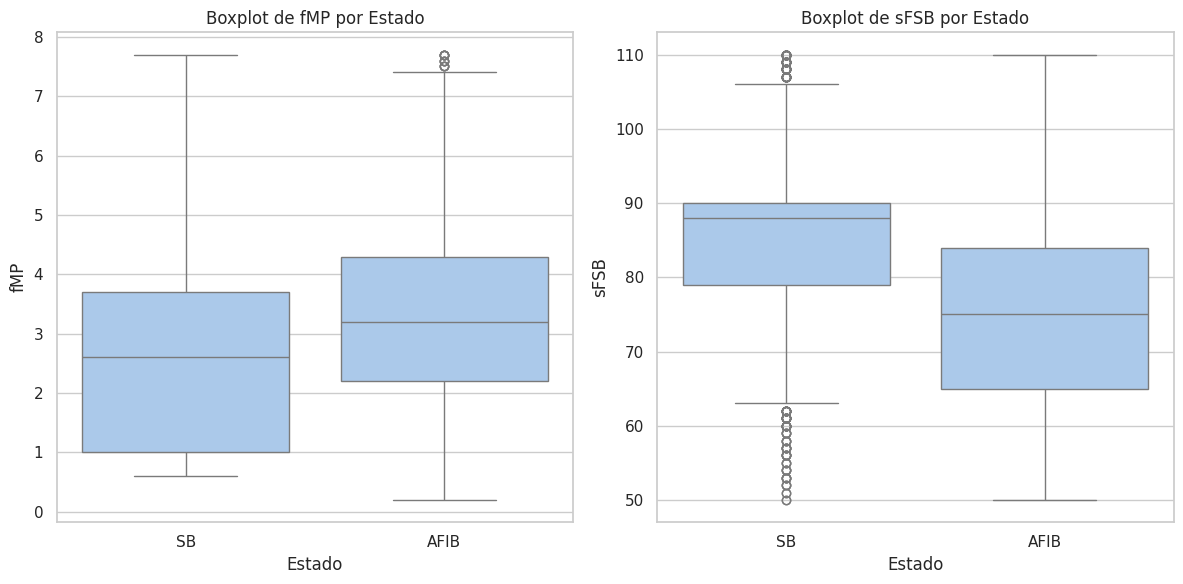


Coeficiente de variación fMP SB: 0.6269746326240898
Coeficiente de variación sFSB SB: 0.10651757921573314
Coeficiente de variación fMP AFIB: 0.44946241486377114
Coeficiente de variación sFSB AFIB: 0.16921331872202452


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Método IQR para detectar outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Eliminar outliers en las columnas 'fMP' y 'sFSB' de forma secuencial
df_completo_cleaned = remove_outliers_iqr(df_completo, 'fMP')
df_completo_cleaned = remove_outliers_iqr(df_completo_cleaned, 'sFSB')

# Estadísticas agrupadas por estado en el dataframe completo
estadisticas_fmp = df_completo_cleaned.groupby('Estado')['fMP'].agg(['mean', 'std', 'min', 'max'])
estadisticas_sfbs = df_completo_cleaned.groupby('Estado')['sFSB'].agg(['mean', 'std', 'min', 'max'])

# Mostrar estadísticas agrupadas
print("\nEstadísticas de fMP por Estado:")
display(estadisticas_fmp)
print("\nEstadísticas de sFSB por Estado:")
display(estadisticas_sfbs)

# Histogramas de fMP y sFSB por estado
plt.figure(figsize=(12, 6))

# Establecer el estilo de Seaborn
sns.set(style="whitegrid", palette="pastel")

# Histograma de fMP para SB y AFIB
plt.subplot(1, 2, 1)
sns.histplot(df_completo_cleaned[df_completo_cleaned['Estado'] == 'SB']['fMP'], label='SB', kde=True, color='#70B4F5', alpha=0.5)
sns.histplot(df_completo_cleaned[df_completo_cleaned['Estado'] == 'AFIB']['fMP'], label='AFIB', kde=True, color='pink', alpha=0.5)
plt.xlabel('fMP')
plt.ylabel('Frecuencia')
plt.title('Histograma de fMP por Estado')
plt.legend()

# Histograma de sFSB para SB y AFIB
plt.subplot(1, 2, 2)
sns.histplot(df_completo_cleaned[df_completo_cleaned['Estado'] == 'SB']['sFSB'], label='SB', kde=True, color='#70B4F5', alpha=0.5)
sns.histplot(df_completo_cleaned[df_completo_cleaned['Estado'] == 'AFIB']['sFSB'], label='AFIB', kde=True, color='pink', alpha=0.5)
plt.xlabel('sFSB')
plt.ylabel('Frecuencia')
plt.title('Histograma de sFSB por Estado')
plt.legend()

plt.tight_layout()
plt.show()

# Boxplots de fMP y sFSB por estado
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Estado', y='fMP', data=df_completo_cleaned)
plt.title('Boxplot de fMP por Estado')

plt.subplot(1, 2, 2)
sns.boxplot(x='Estado', y='sFSB', data=df_completo_cleaned)
plt.title('Boxplot de sFSB por Estado')

plt.tight_layout()
plt.show()

# Cálculo del coeficiente de variación para fMP y sFSB
cv_fmp_sb = np.std(df_completo_cleaned[df_completo_cleaned['Estado'] == 'SB']['fMP']) / np.mean(df_completo_cleaned[df_completo_cleaned['Estado'] == 'SB']['fMP'])
cv_sfbs_sb = np.std(df_completo_cleaned[df_completo_cleaned['Estado'] == 'SB']['sFSB']) / np.mean(df_completo_cleaned[df_completo_cleaned['Estado'] == 'SB']['sFSB'])
cv_fmp_afib = np.std(df_completo_cleaned[df_completo_cleaned['Estado'] == 'AFIB']['fMP']) / np.mean(df_completo_cleaned[df_completo_cleaned['Estado'] == 'AFIB']['fMP'])
cv_sfbs_afib = np.std(df_completo_cleaned[df_completo_cleaned['Estado'] == 'AFIB']['sFSB']) / np.mean(df_completo_cleaned[df_completo_cleaned['Estado'] == 'AFIB']['sFSB'])

print(f"\nCoeficiente de variación fMP SB: {cv_fmp_sb}")
print(f"Coeficiente de variación sFSB SB: {cv_sfbs_sb}")
print(f"Coeficiente de variación fMP AFIB: {cv_fmp_afib}")
print(f"Coeficiente de variación sFSB AFIB: {cv_sfbs_afib}")


## Octava parte:

Determinar si existen diferencias estadísticamente significativas en las características espectrales de las partes cuatro y cinco entre las dos poblaciones estudiadas.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Obtenemos los datos de fMP y sFSB para cada grupo por separado
fmp_sb = df_completo[df_completo['Estado'] == 'SB']['fMP']
fmp_afib = df_completo[df_completo['Estado'] == 'AFIB']['fMP']
sfbs_sb = df_completo[df_completo['Estado'] == 'SB']['sFSB']
sfbs_afib = df_completo[df_completo['Estado'] == 'AFIB']['sFSB']

# Función para realizar pruebas y retornar resultados detallados
def realizar_prueba(data1, data2):
    # Prueba de normalidad con Kolmogorov-Smirnov
    ks_1 = stats.kstest(data1, 'norm', args=(np.mean(data1), np.std(data1)))
    ks_2 = stats.kstest(data2, 'norm', args=(np.mean(data2), np.std(data2)))

    # Prueba de homocedasticidad con Levene
    homocedasticidad = stats.levene(data1, data2)

    # Evaluar normalidad
    normalidad_resultados = {
        'Normalidad SB': 'Aceptar H0: Los datos son normales' if ks_1.pvalue > 0.05 else 'Rechazar H0: Los datos no son normales',
        'Normalidad AFIB': 'Aceptar H0: Los datos son normales' if ks_2.pvalue > 0.05 else 'Rechazar H0: Los datos no son normales'
    }

    # Evaluar homocedasticidad
    homocedasticidad_resultado = {
        'Homocedasticidad': 'Aceptar H0: Las varianzas son iguales' if homocedasticidad.pvalue > 0.05 else 'Rechazar H0: Las varianzas no son iguales'
    }

    # Decidir qué prueba utilizar
    if ks_1.pvalue > 0.05 and ks_2.pvalue > 0.05 and homocedasticidad.pvalue > 0.05:
        # Usar prueba t de Student si normalidad y homocedasticidad son aceptadas
        t_statistic, p_value = stats.ttest_ind(data1, data2)
        prueba = "Prueba t de Student"
        decision = 'Rechaza H0: Hay diferencias significativas en fMP entre SB y AFIB.' if p_value < 0.05 else 'Acepta H0: No hay diferencias significativas en fMP entre SB y AFIB.'
    else:
        # Usar prueba U de Mann-Whitney si no se cumplen las condiciones
        u_statistic, p_value = stats.mannwhitneyu(data1, data2)
        prueba = "Prueba U de Mann-Whitney"
        decision = 'Rechaza H0: Hay diferencias significativas en fMP entre SB y AFIB.' if p_value < 0.05 else 'Acepta H0: No hay diferencias significativas en fMP entre SB y AFIB.'

    return {
        'prueba': prueba,
        'normalidad': normalidad_resultados,
        'homocedasticidad': homocedasticidad_resultado,
        'decision': decision
    }

# Realizar la prueba para fMP
resultado_fmp = realizar_prueba(fmp_sb, fmp_afib)

# Realizar la prueba para sFSB
resultado_sfbs = realizar_prueba(sfbs_sb, sfbs_afib)

# Crear DataFrame para resultados de fMP
df_resultados_fmp = pd.DataFrame({
    'Prueba': [resultado_fmp['prueba']],
    'Decisión': [resultado_fmp['decision']],
    'Normalidad SB': [resultado_fmp['normalidad']['Normalidad SB']],
    'Normalidad AFIB': [resultado_fmp['normalidad']['Normalidad AFIB']],
    'Homocedasticidad': [resultado_fmp['homocedasticidad']['Homocedasticidad']]
})

# Crear DataFrame para resultados de sFSB
df_resultados_sfbs = pd.DataFrame({
    'Prueba': [resultado_sfbs['prueba']],
    'Decisión': [resultado_sfbs['decision']],
    'Normalidad SB': [resultado_sfbs['normalidad']['Normalidad SB']],
    'Normalidad AFIB': [resultado_sfbs['normalidad']['Normalidad AFIB']],
    'Homocedasticidad': [resultado_sfbs['homocedasticidad']['Homocedasticidad']]
})

# Imprimir los resultados
print("Resultados de la prueba para fMP:")
display(df_resultados_fmp)

print("\nResultados de la prueba para sFSB:")
display(df_resultados_sfbs)

Resultados de la prueba para fMP:


,Prueba,Decisión,Normalidad SB,Normalidad AFIB,Homocedasticidad
0,Prueba U de Mann-Whitney,Rechaza H0: Hay diferencias significativas en ...,Rechazar H0: Los datos no son normales,Rechazar H0: Los datos no son normales,Rechazar H0: Las varianzas no son iguales



Resultados de la prueba para sFSB:


,Prueba,Decisión,Normalidad SB,Normalidad AFIB,Homocedasticidad
0,Prueba U de Mann-Whitney,Rechaza H0: Hay diferencias significativas en ...,Rechazar H0: Los datos no son normales,Rechazar H0: Los datos no son normales,Rechazar H0: Las varianzas no son iguales


### **Análisis inferencial**

**Prueba de normalidad:**

> Con el fin de comprobar la distribución de los datos, se realizó una prueba de Kolmogórov, que puede llevarse a cabo en grupos con un tamaño superior de 50 muestras. Esta técnica se aplicó a los archivos correspondientes de la derivación N°2 analizados para cada grupo de sujetos evaluados (AFIB, y SB). A continuación, se plantean las siguientes hipótesis generales de normalidad, estableciendo como criterio un 𝛼=0.05.

- **𝐇𝑜**: Los datos para el parámetro analizado tienen una distribución normal.
- **𝐇𝟏**: Los datos para el parámetro analizado no cuentan con una distribución normal.

> Grupo de patología de AFIB.

>> Se realizó la prueba de Kolmogórov en cada una de las 1780 muestras de pacientes diagnosticados con AFIB respecto a los parámetros de FMP y sFBS, por medio de la cual se observó que, para cada uno de los archivos, se obtuvo un valor de 𝒑<𝛼. Por lo tanto, se rechaza la hipótesis nula de distribución normal, apoyando la hipótesis alternativa, que indica que los datos no presentan una tendencia conocida.

> Grupo de patología de SB.

>>Se ejecutó la prueba de Kolmogórov en cada uno de los 3888 sujetos diagnosticados con SB tomando como base los parámetros de FMP y sFBS. En este caso, se evidenció que la totalidad de los datos no siguen una distribución normal, por  consiguiente, se rechaza la hipótesis nula que sostenía la tendencia lineal de las variables.

**Prueba de homocedasticidad:**

> Con el fin de analizar la similitud de las varianzas respecto a las características de FMP y sFSB de cada patología (SB y AFIB), se realizó una prueba de Levene. Esta prueba permite corroborar o descartar si las muestras provienen de una población con igual varianza y sí sus diferencias pueden deberse a elementos aleatorios. Para desarrollar este método, se estipularon las siguientes hipótesis generales para cada par de archivos de los grupos patológicos:

- **𝐇𝑜**: El parámetro FMP o de sFBS del grupo de AFIB y SB presentan igualdad de varianzas (σ𝟣 = σ𝟤 = ⋯ = σn).
- **𝐇𝟏**: Al menos una de las varianzas del parámetro FMP o de sFBS del grupo de AFIB y SB es diferente.

>Se recopilaron las señales de cada grupo patológico con el fin de contrastar todas las varianzas y se encontró que tanto para el FMP y para el sFBS se consiguió un valor 𝒑<𝛼, siendo α = 0.05. Por lo tanto, se rechazó la hipótesis nula y se respaldó la hipótesis alternativa, indicando que no hay presencia del fenómeno de homocedasticidad, es decir, no hay igualdad de las varianzas entre el grupo de AFIB y SB respecto a la frecuencia de máxima potencia y la suma de frecuencias de sub-bandas.

**Prueba no paramétrica U de Mann-Whitney:**

> Debido al incumplimiento de la prueba de normalidad, se decidió optar por el desarrollo de pruebas no paramétricas, para ello se realizó la prueba U de Mann-Whitney en los parámetros de FMP y sFBS entre los grupos de SB y AFIB tomando un valor α = 0.05 para las siguientes hipótesis:

- **𝐇𝑜**: No existe diferencia en la tendencia central (mediana) entre el parámetro FMP o sFBS del grupo de AFIB y el grupo SB.
- **𝐇𝟭**: Existe diferencia en la tendencia central de los datos entre el  parámetro FMP o sFBS del grupo de AFIB y el grupo SB

>Se observó que tanto para el parámetro de FMP y sFBS las muestras de AFIB y SB presentaron un valor p > α, lo que indica que hay una diferencia significativa en las tendencias centrales de ambos grupos, hecho que permite señalar la adecuada discriminación entre los sujetos diagnósticados con alguna de las dos condiciones clínicas. A través de lo anterior es posible distinguir las actividades cardíacas de la fibrilación auricular y la bradicardia sinusal teniendo en cuenta sus comportamientos eléctricos analizados en el dominio de la frecuencia, donde sus datos varían de acuerdo a la orientación de su tendencia central (mediana).


## Conclusiones:

> El biespectro ha demostrado ser una herramienta avanzada y eficaz para el análisis de señales fisiológicas complejas, como el electrocardiograma (ECG). A diferencia de los métodos tradicionales que se enfocan en el espectro de potencia lineal, el análisis biespectral tiene la capacidad de detectar interacciones no lineales y correlaciones entre diferentes frecuencias en la señal cardíaca. Esto lo convierte en una técnica especialmente útil para la identificación temprana de anomalías que podrían pasar desapercibidas con otros métodos, mejorando así la precisión diagnóstica en cardiología.

> El análisis de patrones en las gráficas de biespectro y bicoherencia facilita la distinción entre diferentes tipos de arritmias, como la fibrilación auricular (AFIB) y la bradicardia sinusal (SB). En el caso de la AFIB, se observa una mayor dispersión de frecuencias y una reducción en el acoplamiento de fase, lo que sugiere una actividad eléctrica más caótica del corazón. Por el contrario, la SB muestra patrones más coherentes y concentrados en las bajas frecuencias, lo que indica una dinámica menos compleja. Estas diferencias en los patrones pueden ser fundamentales para el diagnóstico preciso y la personalización del tratamiento.

> Las señales cardíacas presentan una dinámica intrínsecamente no lineal debido a la complejidad de los procesos fisiológicos involucrados en la actividad del corazón. El uso del biespectro para cuantificar estas interacciones no lineales proporciona una visión más detallada de la actividad cardíaca, lo que permite identificar cambios sutiles en la estructura de la señal asociados a diferentes patologías. La capacidad de analizar estas interacciones facilita la comprensión de los mecanismos subyacentes de las arritmias y puede abrir nuevas vías para la investigación en cardiología.

## Referencias:

**Referencias**

[1]A. Goshvarpour, A. Goshvarpour, S. Rahati, and V. Saadatian, "Bispectrum estimation of electroencephalogram signals during meditation," Iran J Psychiatry Behav Sci, vol. 6, no. 2, pp. 48-54, Fall 2012. [PMID: 24644482; PMCID: PMC3940018].

[2] S. Ghafoori, A. Rabiee, A. Cetera, and R. Abiri, "Bispectrum Analysis of Noninvasive EEG Signals Discriminates Complex and Natural Grasp Types," arXiv, 01 Feb 2024. [Online]. Available: https://arxiv.org/html/2402.01026v1.

[3]J. Mackie, “Fourier and Bispectral Analysis of Signals,” Medium, Dec. 20, 2022. https://medium.com/@mackiej/fourier-and-bispectral-analysis-of-signals-c7a71021b1c8

[4]Ji-Wu Zhang, Chong-Xun Zheng, y An Xie, «Bispectrum analysis of focal ischemic cerebral EEG signal using third-order recursion method», IEEE Trans. Biomed. Eng., vol. 47, n.o 3, pp. 352-359, mar. 2000, doi: 10.1109/10.827296.

[5]Turbustat. “Bispectrum — turbustat v1.4.dev5+gc837780.” TurbuStat, 2016, https://turbustat.readthedocs.io/en/latest/tutorials/statistics/bispectrum_example.html. Accessed 20 October 2024.

[6]UC San Diego Health, "La bradicardia sinusal," myhealth.ucsd.edu, 2023. [En línea]. Disponible en: https://myhealth.ucsd.edu/Spanish/Encyclopedia/134,583es#:~:text=la%20bradicardia%20sinusal-,La%20bradicardia%20sinusal%20es%20un%20tipo%20de%20ritmo%20card%C3%ADaco%20lento,que%20hay%20un%20problema%20subyacente. [Accedido: 20-oct-2024].

[7]Mayo Clinic, "Fibrilación auricular," mayoclinic.org, 2023. [En línea]. Disponible en: https://www.mayoclinic.org/es/diseases-conditions/atrial-fibrillation/symptoms-causes/syc-20350624. [Accedido: 20-oct-2024].

[8]Alessio, Basti., Guido, Nolte., Roberto, Guidotti., Risto, J, Ilmoniemi., G., Romani., Vittorio, Pizzella., Laura, Marzetti. (2024). 1. A bicoherence approach to analyze multi-dimensional cross-frequency coupling in EEG/MEG data.. Dental science reports,  doi: 10.1038/s41598-024-57014-0

[9]Sandip, V., George., G., Ambika., Ranjeev, Misra. (2017). 2. Detecting dynamical states from noisy time series using bicoherence. Nonlinear Dynamics,  doi: 10.1007/S11071-017-3465-6

[10]Sandip, V., George., G., Ambika., Ranjeev, Misra. (2016). 3. Detecting Dynamical States from Noisy Time Series using Bicoherence. arXiv: Chaotic Dynamics,  doi: 10.1007/S11071-017-3465-6

[11]Kimitaka, Itoh., Yoshihiko, Nagashima., Sanae, I., Itoh., Patrick, Diamond., Akihide, Fujisawa., Masatoshi, Yagi., Atsushi, Fukuyama. (2005). 5. On the bicoherence analysis of plasma turbulence. Physics of Plasmas,  doi: 10.1063/1.2062627
